## Step 1: Setup Basic Parameters

In [1]:
import json
import numpy as np
import pandas as pd

# Path to the JSON file with new parameters
json_path = 'Fiji_scenario6.json'

# Read the JSON file
with open(json_path, 'r') as file:
    parameters = json.load(file)

# Display the loaded parameters to confirm
parameters

{'Tmax': 60,
 'D': 26,
 'L': 1,
 'ls': 1,
 'le': 60,
 'α': 0.6,
 'β': 0.2,
 'γ': 0.3,
 'reduction_factor': 0.0,
 'Connectivity Matrix W': {'Outside World-FP,Suva-FP': 3000,
  'Outside World-AP,Nadi-AP': 4500,
  'Denarau-FP,Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP': 294,
  'Denarau-FP,Bounty Island-FP': 90,
  'Denarau-FP,Tokoriki Island-FP': 45,
  'Denarau-FP,Group 2 (Tadrai/Mana)-FP': 120,
  'Denarau-FP,Group 3 (Treasure/Beachconber)-FP': 60,
  'Denarau-FP,Matamanoa Island-FP': 22,
  'Natovi Jetty-FP,Nabouwalu-FP': 1200,
  'Lautoka-FP,Group 1 (Paradise/MantaRay/Barefoot)-FP': 361,
  'Lautoka-FP,Coralview Island-FP': 333,
  'Lautoka-FP,Octopus Resort-FP': 75,
  'Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Bounty Island-FP': 50,
  'Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP,Group 2 (Tadrai/Mana)-FP': 80,
  'Bounty Island-FP,Group 2 (Tadrai/Mana)-FP': 70,
  'Bounty Island-FP,Group 3 (Treasure/Beachconber)-FP': 50,
  'Suva-FP,Kadavu-FP': 1630,
  'Group 1 (Paradise/MantaRay/Barefo

In [2]:
# Parameters
Tmax = parameters['Tmax'] #time frame
D = parameters['D']  # Number of locations
L = parameters['L']  # Number of locations connected to the outside world
reduction_factor = parameters['reduction_factor'] #percentage of people who will be connected is there is a lockdown
Tmax, D, L, reduction_factor

(60, 26, 1, 0.0)

## Step 2: Create Connectivity Matrix W

In [3]:
def extract_locations(parameters):
    # This function extracts all unique locations from the keys of the connectivity matrix in the order they appear
    locations_ordered = []
    seen_locations = set()
    for key in parameters['Connectivity Matrix W'].keys():
        # Split the key on the comma
        places = key.split(',')
        for place in places:
            place_cleaned = place.strip()
            if place_cleaned not in seen_locations:
                seen_locations.add(place_cleaned)
                locations_ordered.append(place_cleaned)
    return locations_ordered

def create_index_mapping(locations):
    # This function creates a dictionary that maps location names to indices
    return {location: index for index, location in enumerate(locations)}

def create_connectivity_matrix(parameters, location_to_index):
    D = len(location_to_index)  # The number of locations
    W = np.zeros((D, D), dtype=int)  # Initialize the connectivity matrix with zeros

    # Populate the connectivity matrix using the index mapping
    for key, value in parameters['Connectivity Matrix W'].items():
        places = key.split(',')
        i = location_to_index[places[0].strip()]
        j = location_to_index[places[1].strip()]
        W[i, j] = value

    # Make the matrix symmetrical
    W = W + W.T

    # Ensure the diagonal is zero
    np.fill_diagonal(W, 0)
    return W

# Extract locations in the order they appear in the JSON file
locations_ordered = extract_locations(parameters)

# Create a mapping from location names to indices
location_to_index = create_index_mapping(locations_ordered)

# Create the connectivity matrix
W = create_connectivity_matrix(parameters, location_to_index)

# Create a DataFrame from the connectivity matrix with the ordered locations
W_df = pd.DataFrame(W, index=locations_ordered, columns=locations_ordered)

W_df

Outside World-FP  Suva-FP  \
Outside World-FP                                              0     3000   
Suva-FP                                                    3000        0   
Outside World-AP                                              0        0   
Nadi-AP                                                       0        0   
Denarau-FP                                                    0        0   
Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP                 0        0   
Bounty Island-FP                                              0        0   
Tokoriki Island-FP                                            0        0   
Group 2 (Tadrai/Mana)-FP                                      0        0   
Group 3 (Treasure/Beachconber)-FP                             0        0   
Matamanoa Island-FP                                           0        0   
Natovi Jetty-FP                                               0        0   
Nabouwalu-FP                                                  0        0   
Lautoka-FP                                                    0        0   
Group 1 (Paradise/MantaRay/Barefoot)-FP                       0        0   
Coralview Island-FP                                           0        0   
Octopus Resort-FP                                             0        0   
Kadavu-FP                                                     0     1630   
Yasawa Island-AP                                              0        0   
Malolo Lailai-AP                                              0        0   
Pacific Harbour-AP                                            0        0   
Nausori-AP                                                    0        0   
Vunisea-AP                                                    0        0   
Savusavu-AP                                                   0        0   
Labasa-AP                                                     0        0   
Matei-AP                                                      0        0   
Moala-AP                                                      0        0   
Bureta-AP                                                     0        0   
Lakeba-AP                                                     0        0   
Cicia-AP                                                      0        0   
Vanubalavu-AP                                                 0        0   
Wakaya Island-AP                                              0        0   
Koro-AP                                                       0        0   

                                               Outside World-AP  Nadi-AP  \
Outside World-FP                                              0        0   
Suva-FP                                                       0        0   
Outside World-AP                                              0     4500   
Nadi-AP                                                    4500        0   
Denarau-FP                                                    0        0   
Group 4 (Tropica/Malolo/Likuliku/Castaway)-FP                 0        0   
Bounty Island-FP                                              0        0   
Tokoriki Island-FP                                            0        0   
Group 2 (Tadrai/Mana)-FP                                      0        0   
Group 3 (Treasure/Beachconber)-FP                             0        0   
Matamanoa Island-FP                                           0        0   
Natovi Jetty-FP                                               0        0   
Nabouwalu-FP                                                  0        0   
Lautoka-FP                                                    0        0   
Group 1 (Paradise/MantaRay/Barefoot)-FP                       0        0   
Coralview Island-FP                                           0        0   
Octopus Resort-FP                                             0        0   
Kadavu-FP                                                     0        0   
Yasawa Island-AP  

In [4]:
#Initialize n_per_community with the values of 'n' from the JSON file
n_per_community = parameters['n']

In [5]:
# Print all values of 'n' for each population
for community, n_value in n_per_community.items():
    print(f'{community}: {n_value}')

Nadi: 59717
Sawakasa: 53614
Vuda(Lautoka): 98264
Malolo(Tropica/Malolo/Likuliku/Castaway): 1961
Vuda(Bounty Island): 600
Suva: 94088
Naviti(Paradise/MantaRay/Barefoot): 2410
Malolo(Tokoriki Island): 300
Malolo(Tadrai/Mana): 800
Vuda(Treasure/Beachconber): 400
Yasawa: 2226
Malolo(Matamanoa Island): 150
Naviti: 500
Bua/Macuata/Cakaudrove: 124994
Kadavu: 10869
Serua: 16366
Tavuki: 4033
Moala: 1383
Lakeba: 1557
Cicia: 1028
Lomaloma/Mualevu: 1753
Ovalau: 9606
LomaivitiOtherIslands: 230
Koro: 2937
Wainikeli: 4486
Outside World: 8100000000


In [6]:
# Reverse mapping of ports to communities to facilitate grouping by community in the connectivity matrix.
port_to_community = {}
for community, ports in parameters['ports_according_communities'].items():
    for port in ports:
        port_to_community[port] = community

# Initialize the community connectivity matrix
community_names = list(parameters['ports_according_communities'].keys())
community_index = {name: i for i, name in enumerate(community_names)}
community_connectivity = np.zeros((len(community_names), len(community_names)), dtype=int)

# Fill the matrix based on the connections between ports, grouping by communities.
for (port_from_to, passengers) in parameters['Connectivity Matrix W'].items():
    port_from, port_to = port_from_to.split(',')
    community_from = port_to_community[port_from.strip()]
    community_to = port_to_community[port_to.strip()]
    i = community_index[community_from]
    j = community_index[community_to]
    community_connectivity[i, j] += passengers
    community_connectivity[j, i] += passengers  # Assuming bidirectional connection

# Convert community connectivity matrix to DataFrame for better visualization.
community_connectivity_df = pd.DataFrame(community_connectivity, index=community_names, columns=community_names)

community_connectivity_df

Outside World  Nadi  Sawakasa  \
Outside World                                         0  4500         0   
Nadi                                               4500     0         0   
Sawakasa                                              0     0         0   
Vuda(Lautoka)                                         0     0         0   
Malolo(Tropica/Malolo/Likuliku/Castaway)              0   494         0   
Malolo(Matamanoa Island)                              0    22         0   
Vuda(Bounty Island)                                   0    90         0   
Suva                                               3000  6000         0   
Naviti(Paradise/MantaRay/Barefoot)                    0     0         0   
Malolo(Tokoriki Island)                               0    45         0   
Malolo(Tadrai/Mana)                                   0   120         0   
Vuda(Treasure/Beachconber)                            0    60         0   
Yasawa                                                0   150         0   
Bua/Macuata/Cakaudrove                                0  7500      1200   
Naviti                                                0     0         0   
Kadavu                                                0     0         0   
Serua                                                 0  2454         0   
Tavuki                                                0   300         0   
Moala                                                 0     0         0   
Lakeba                                                0     0         0   
Cicia                                                 0     0         0   
Lomaloma/Mualevu                                      0     0         0   
Ovalau                                                0     0         0   
LomaivitiOtherIslands                                 0     0         0   
Koro                                                  0     0         0   
Wainikeli                                             0   200         0   

                                          Vuda(Lautoka)  \
Outside World                                         0   
Nadi                                                  0   
Sawakasa                                              0   
Vuda(Lautoka)                                         0   
Malolo(Tropica/Malolo/Likuliku/Castaway)              0   
Malolo(Matamanoa Island)                              0   
Vuda(Bounty Island)                                   0   
Suva                                                  0   
Naviti(Paradise/MantaRay/Barefoot)                  361   
Malolo(Tokoriki Island)                               0   
Malolo(Tadrai/Mana)                                   0   
Vuda(Treasure/Beachconber)                            0   
Yasawa                                              333   
Bua/Macuata/Cakaudrove                                0   
Naviti                                               75   
Kadavu                                                0   
Serua                                                 0   
Tavuki                                                0   
Moala                                                 0   
Lakeba                                                0   
Cicia                                                 0   
Lomaloma/Mualevu                                      0   
Ovalau                                                0   
LomaivitiOtherIslands                                 0   
Koro                                                  0   
Wainikeli                                             0   

                                          Malolo(Tropica/Malolo/Likuliku/Castaway)  \
Outside World                                                                    0   
Nadi                                                                           494   
Sawakasa                                                                         0   
Vuda(Lautoka)                                                                 

## Step 3: Initialize State Vectors

In [7]:
def initialize_state_vectors(parameters):
    # Retrieve community data and standard percentages
    n_per_community = parameters['n'].copy()
    communities_ordered = list(n_per_community.keys())
    percentages_standard = np.array(parameters['percentages_standard'])
    percentages_outside_world = np.array(parameters['percentages_outside_world'])

    # Initialize the state vectors
    x = np.zeros((len(communities_ordered), 4), dtype=int)  # Use integer for state vectors
    
    # Set up state vectors for each community
    for i, community in enumerate(communities_ordered):
        n = n_per_community[community]  # Population of the community
        if community == "Outside World":
            # Use specific percentages for the "Outside World"
            x[i] = np.round(percentages_outside_world * n).astype(int)
        else:
            # Use standard percentages for domestic communities
            x[i] = np.round(percentages_standard * n).astype(int)

    # Convert the state vectors to a DataFrame for better visualization
    state_vectors_df = pd.DataFrame(x, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'],
                                    index=communities_ordered)

    return state_vectors_df, communities_ordered

In [8]:
state_vectors_df, communities_ordered = initialize_state_vectors(parameters)
x = state_vectors_df.values 

In [9]:
state_vectors_df

Susceptible     Exposed    Infected  \
Nadi                                            17915       17915       17915   
Sawakasa                                        16084       16084       16084   
Vuda(Lautoka)                                   29479       29479       29479   
Malolo(Tropica/Malolo/Likuliku/Castaway)          588         588         588   
Vuda(Bounty Island)                               180         180         180   
Suva                                            28226       28226       28226   
Naviti(Paradise/MantaRay/Barefoot)                723         723         723   
Malolo(Tokoriki Island)                            90          90          90   
Malolo(Tadrai/Mana)                               240         240         240   
Vuda(Treasure/Beachconber)                        120         120         120   
Yasawa                                            668         668         668   
Malolo(Matamanoa Island)                           45          45          45   
Naviti                                            150         150         150   
Bua/Macuata/Cakaudrove                          37498       37498       37498   
Kadavu                                           3261        3261        3261   
Serua                                            4910        4910        4910   
Tavuki                                           1210        1210        1210   
Moala                                             415         415         415   
Lakeba                                            467         467         467   
Cicia                                             308         308         308   
Lomaloma/Mualevu                                  526         526         526   
Ovalau                                           2882        2882        2882   
LomaivitiOtherIslands                              69          69          69   
Koro                                              881         881         881   
Wainikeli                                        1346        1346        1346   
Outside World                              1620000000  1620000000  4050000000   

                                          Recovered  
Nadi                                           5972  
Sawakasa                                       5361  
Vuda(Lautoka)                                  9826  
Malolo(Tropica/Malolo/Likuliku/Castaway)        196  
Vuda(Bounty Island)                              60  
Suva                                           9409  
Naviti(Paradise/MantaRay/Barefoot)              241  
Malolo(Tokoriki Island)                          30  
Malolo(Tadrai/Mana)                              80  
Vuda(Treasure/Beachconber)                       40  
Yasawa                                          223  
Malolo(Matamanoa Island)                         15  
Naviti                                           50  
Bua/Macuata/Cakaudrove                        12499  
Kadavu                                         1087  
Serua                                          1637  
Tavuki                                          403  
Moala                                           138  
Lakeba                                          156  
Cicia                                           103  
Lomaloma/Mualevu                                175  
Ovalau                                          961  
LomaivitiOtherIslands                            23  
Koro                                            294  
Wainikeli                                       449  
Outside World                             810000000

## Step 4: Lockdown Logic

In [10]:
def update_community_connectivity_df(W_df, ports_according_communities, port_to_community):
    community_names = list(ports_according_communities.keys())
    community_connectivity = np.zeros((len(community_names), len(community_names)), dtype=int)
    
    community_index = {name: i for i, name in enumerate(community_names)}
    
    for port_from in W_df.index:
        for port_to in W_df.columns:
            if W_df.loc[port_from, port_to] > 0:
                community_from = port_to_community.get(port_from, "")
                community_to = port_to_community.get(port_to, "")
                if community_from and community_to:
                    i = community_index[community_from]
                    j = community_index[community_to]
                    community_connectivity[i, j] += W_df.loc[port_from, port_to]
    
    return pd.DataFrame(community_connectivity, index=community_names, columns=community_names)

def apply_lockdown_and_update(lockdown_ports, reduction_factor):
    global W_df, community_connectivity_df
    W_df = original_W_df.copy()  # Restore W_df to its original state before lockdown
    
    for port in lockdown_ports:
        connected_ports = W_df[port].index.tolist()
        W_df.loc[port, connected_ports] *= reduction_factor
        W_df.loc[connected_ports, port] *= reduction_factor
    
    community_connectivity_df = update_community_connectivity_df(W_df, parameters['ports_according_communities'], port_to_community)

In [11]:
# Applying changes
original_W_df = W_df.copy()
lockdown_ports = parameters['lockdown_ports']
apply_lockdown_and_update(lockdown_ports, reduction_factor)

community_connectivity_df = update_community_connectivity_df(W_df, parameters['ports_according_communities'], port_to_community)

In [12]:
community_connectivity_df

Outside World  Nadi  Sawakasa  \
Outside World                                         0     0         0   
Nadi                                                  0     0         0   
Sawakasa                                              0     0         0   
Vuda(Lautoka)                                         0     0         0   
Malolo(Tropica/Malolo/Likuliku/Castaway)              0   494         0   
Malolo(Matamanoa Island)                              0    22         0   
Vuda(Bounty Island)                                   0    90         0   
Suva                                                  0     0         0   
Naviti(Paradise/MantaRay/Barefoot)                    0     0         0   
Malolo(Tokoriki Island)                               0    45         0   
Malolo(Tadrai/Mana)                                   0   120         0   
Vuda(Treasure/Beachconber)                            0    60         0   
Yasawa                                                0   150         0   
Bua/Macuata/Cakaudrove                                0  7500      1200   
Naviti                                                0     0         0   
Kadavu                                                0     0         0   
Serua                                                 0  2454         0   
Tavuki                                                0   300         0   
Moala                                                 0     0         0   
Lakeba                                                0     0         0   
Cicia                                                 0     0         0   
Lomaloma/Mualevu                                      0     0         0   
Ovalau                                                0     0         0   
LomaivitiOtherIslands                                 0     0         0   
Koro                                                  0     0         0   
Wainikeli                                             0   200         0   

                                          Vuda(Lautoka)  \
Outside World                                         0   
Nadi                                                  0   
Sawakasa                                              0   
Vuda(Lautoka)                                         0   
Malolo(Tropica/Malolo/Likuliku/Castaway)              0   
Malolo(Matamanoa Island)                              0   
Vuda(Bounty Island)                                   0   
Suva                                                  0   
Naviti(Paradise/MantaRay/Barefoot)                  361   
Malolo(Tokoriki Island)                               0   
Malolo(Tadrai/Mana)                                   0   
Vuda(Treasure/Beachconber)                            0   
Yasawa                                              333   
Bua/Macuata/Cakaudrove                                0   
Naviti                                               75   
Kadavu                                                0   
Serua                                                 0   
Tavuki                                                0   
Moala                                                 0   
Lakeba                                                0   
Cicia                                                 0   
Lomaloma/Mualevu                                      0   
Ovalau                                                0   
LomaivitiOtherIslands                                 0   
Koro                                                  0   
Wainikeli                                             0   

                                          Malolo(Tropica/Malolo/Likuliku/Castaway)  \
Outside World                                                                    0   
Nadi                                                                           494   
Sawakasa                                                                         0   
Vuda(Lautoka)                                                                 

## Step 5: Implement the Migration Logic

In [13]:
def balanced_migration_step(W_df, x, communities_ordered, port_to_community, n):
    D = len(communities_ordered)
    Delta_out = np.zeros_like(x)  # Matrix of output changes
    Delta_in = np.zeros_like(x)   # Matrix of input changes

    for port_from in W_df.index:
        for port_to in W_df.columns:
            if W_df.loc[port_from, port_to] > 0:  # Checks for possible migration between ports
                community_from = port_to_community.get(port_from, "")
                community_to = port_to_community.get(port_to, "")
                if community_from and community_to:
                    i = communities_ordered.index(community_from)
                    j = communities_ordered.index(community_to)

                    migration_value = W_df.loc[port_from, port_to]

                    for cat in np.random.permutation(4):  # Itera in random order for each state
                        available_to_move = min(x[i, cat] - Delta_out[i, cat], migration_value)
                        available_capacity = n[community_to] - np.sum(x[j]) - np.sum(Delta_in[j])

                        moving_pop = min(available_to_move, available_capacity)
                        Delta_out[i, cat] += moving_pop
                        Delta_in[j, cat] += moving_pop

                        migration_value -= moving_pop
                        if migration_value <= 0:
                            break

    # Apply migration changes
    x_new = x - Delta_out + Delta_in

    # Ensure that no state exceeds the initial population
    x_new = np.clip(x_new, 0, None)
    total_population_check = np.sum(x_new, axis=1)
    for i in range(D):
        if total_population_check[i] > n[communities_ordered[i]]:
            excess_population = total_population_check[i] - n[communities_ordered[i]]
            x_new[i, np.argmax(x_new[i])] -= excess_population

    return x_new

In [14]:
# Run the migration step
x_new = balanced_migration_step(W_df, x, communities_ordered, port_to_community, n_per_community)

# Now that x_new is defined, you can create a DataFrame and then print it.
x_new_df = pd.DataFrame(x_new, index=communities_ordered, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'])

In [15]:
x_new_df

Susceptible     Exposed    Infected  \
Nadi                                            17915       17916       17915   
Sawakasa                                        16084       16085       16084   
Vuda(Lautoka)                                   29480       29479       29479   
Malolo(Tropica/Malolo/Likuliku/Castaway)          588         588         589   
Vuda(Bounty Island)                               180         180         180   
Suva                                            28226       28226       28226   
Naviti(Paradise/MantaRay/Barefoot)                722         723         723   
Malolo(Tokoriki Island)                            90          90          90   
Malolo(Tadrai/Mana)                               240         240         240   
Vuda(Treasure/Beachconber)                        120         120         120   
Yasawa                                            668         667         668   
Malolo(Matamanoa Island)                           45          45          45   
Naviti                                            150         150         150   
Bua/Macuata/Cakaudrove                          37498       37497       37498   
Kadavu                                           3261        3260        3261   
Serua                                            4909        4910        4910   
Tavuki                                           1210        1210        1210   
Moala                                             415         415         415   
Lakeba                                            467         467         467   
Cicia                                             308         308         308   
Lomaloma/Mualevu                                  526         526         526   
Ovalau                                           2882        2881        2882   
LomaivitiOtherIslands                              69          69          69   
Koro                                              881         881         881   
Wainikeli                                        1346        1346        1345   
Outside World                              1620000000  1620000000  4050000000   

                                          Recovered  
Nadi                                           5971  
Sawakasa                                       5361  
Vuda(Lautoka)                                  9826  
Malolo(Tropica/Malolo/Likuliku/Castaway)        196  
Vuda(Bounty Island)                              60  
Suva                                           9410  
Naviti(Paradise/MantaRay/Barefoot)              241  
Malolo(Tokoriki Island)                          30  
Malolo(Tadrai/Mana)                              80  
Vuda(Treasure/Beachconber)                       40  
Yasawa                                          223  
Malolo(Matamanoa Island)                         15  
Naviti                                           50  
Bua/Macuata/Cakaudrove                        12500  
Kadavu                                         1086  
Serua                                          1637  
Tavuki                                          403  
Moala                                           138  
Lakeba                                          156  
Cicia                                           103  
Lomaloma/Mualevu                                175  
Ovalau                                          961  
LomaivitiOtherIslands                            23  
Koro                                            294  
Wainikeli                                       449  
Outside World                             810000000

## Step 6: Implement Infection Dynamics

In [16]:
def infection_step(x_new, lockdown=False):
    # Defines rates of disease transmission, recovery and progression.
    α = parameters['α']  # The transmission rate
    β = parameters['β']  # Recovery rate
    γ = parameters['γ']  # Rate of progression of those exposed to infectious diseases

    # D is the total number of communities.
    D = x_new.shape[0]
    
    # Initializes an array to store the updated states after the infection step.
    x_updated = np.zeros_like(x_new)

    for i in range(D):
        # Calculates the total population of community i.
        n = x_new[i, :].sum()
        
        if n > 0:
            # Extracts the individual states for the community i.
            S, E, I, R = x_new[i, 0], x_new[i, 1], x_new[i, 2], x_new[i, 3]

            # Calculates transitions between states based on current rates and population.
            δ_SE = np.random.binomial(S, α*I/n if n > 0 else 0)  # Susceptibles that become exposed
            δ_EI = np.random.binomial(E, γ)  # Exposed who become infected
            δ_IR = np.random.binomial(I, β)  # Infected recovering

            # Updates the states for community i based on the calculated transitions.
            x_updated[i] = [S - δ_SE, E + δ_SE - δ_EI, I + δ_EI - δ_IR, R + δ_IR]
    
    return x_updated

## Step 7:. Run the Simulation

In [17]:
def run_simulation(parameters, W_df, original_W_df):
    # Initializes state and connectivity vectors
    state_vectors_df, communities_ordered = initialize_state_vectors(parameters)
    x = state_vectors_df.to_numpy()  # Extracts the numpy array for use in the simulation

    # Initializes the history to store the status for each day.
    history = []

    # Reads the initial population total for each community from the JSON
    n = parameters['n']

    # Retrieves specific parameters from the parameter dictionary
    lockdown_start_day = parameters['ls']
    lockdown_duration = parameters['le']
    lockdown_ports = parameters['lockdown_ports']
    lockdown_end_day = lockdown_start_day + lockdown_duration

    # Bucle de simulación
    for day in range(parameters['Tmax']):
        # Apply lockdown
        if day == lockdown_start_day:
            apply_lockdown_and_update(lockdown_ports, parameters['reduction_factor'])
            
        # End lockdown
        if day == lockdown_end_day + 1:
            W_df = original_W_df.copy()

        # Migration step only when not in lockdown
        if not (lockdown_start_day <= day <= lockdown_end_day):
            x = balanced_migration_step(W_df, x, communities_ordered, port_to_community, n)
        
        # Step of infection occurs every day
        x = infection_step(x, parameters)  # Pass parameters to infection_step to use the rates

        # Records the status for day t
        history.append(x.copy())

    return history

In [18]:
# Run the simulation
history = run_simulation(parameters, W_df, original_W_df)

In [19]:
# Convert the history list to a DataFrame
days = [f"Day {i + 1}" for i in range(len(history))]
communities = communities_ordered
index = pd.MultiIndex.from_product([days, communities], names=['Day', 'Community'])
history_reshaped = np.vstack(history)  # Aplanar la lista de arrays en un único array
history_df = pd.DataFrame(history_reshaped, columns=['Susceptible', 'Exposed', 'Infected', 'Recovered'], index=index)

In [20]:
history_df

Susceptible  Exposed  \
Day    Community                                                        
Day 1  Nadi                                            14737    15666   
       Sawakasa                                        13094    14165   
       Vuda(Lautoka)                                   24215    25870   
       Malolo(Tropica/Malolo/Likuliku/Castaway)          486      531   
       Vuda(Bounty Island)                               140      162   
...                                                      ...      ...   
Day 60 Ovalau                                            171        0   
       LomaivitiOtherIslands                               1        0   
       Koro                                               43        0   
       Wainikeli                                          87        0   
       Outside World                                83818194     3828   

                                                 Infected   Recovered  
Day    Community                                                       
Day 1  Nadi                                         19761        9553  
       Sawakasa                                     17706        8649  
       Vuda(Lautoka)                                32482       15697  
       Malolo(Tropica/Malolo/Likuliku/Castaway)       641         303  
       Vuda(Bounty Island)                            202          96  
...                                                   ...         ...  
Day 60 Ovalau                                           0        9435  
       LomaivitiOtherIslands                            0         229  
       Koro                                             0        2894  
       Wainikeli                                        0        4399  
       Outside World                                69491  8016108487  

[1560 rows x 4 columns]

## Step 8: Tables

In [21]:
# Create a list to store the data
all_data = []

# Exclude “Outside World” communities for the calculations
communities = [comm for comm in communities_ordered]

# Iterate on communities
for community in communities:
    # Extract the data for each community from the DataFrame history_df
    community_data = history_df.xs(community, level='Community')

    # Calculating percentage distributions and rounding to two decimal places
    total_population_by_day = community_data.sum(axis=1).values.reshape(-1, 1)
    percentages = (community_data.values / total_population_by_day) * 100
    percentages = np.round(percentages, 2)  # Redondear a dos decimales

    # Combine total data and percentages
    combined_data = np.hstack((community_data.values, percentages))

    for day, day_data in enumerate(combined_data, start=1):
        all_data.append((community, day, *day_data))

# Columns now include both totals and percentages.
columns_combined = ['Community', 'Day', 'Susceptible', 'Exposed', 'Infected', 'Recovered', 'Susceptible (%)', 'Exposed (%)', 'Infected (%)', 'Recovered (%)']

# Convert the list into a DataFrame
all_communities_df = pd.DataFrame(all_data, columns=columns_combined)

# Set up a multiple index based on 'Community' and 'Day'.
all_communities_df.set_index(['Community', 'Day'], inplace=True)

# Display the combined DataFrame
all_communities_df

Susceptible  Exposed  Infected     Recovered  \
Community     Day                                                 
Nadi          1        14737.0  15666.0   19761.0  9.553000e+03   
              2        11776.0  13907.0   20532.0  1.350200e+04   
              3         9371.0  12119.0   20616.0  1.761100e+04   
              4         7439.0  10439.0   20226.0  2.161300e+04   
              5         5917.0   8950.0   19183.0  2.566700e+04   
...                        ...      ...       ...           ...   
Outside World 56    83821199.0   8389.0  157156.0  8.016013e+09   
              57    83820203.0   6860.0  128327.0  8.016045e+09   
              58    83819349.0   5710.0  104325.0  8.016071e+09   
              59    83818730.0   4658.0   84996.0  8.016092e+09   
              60    83818194.0   3828.0   69491.0  8.016108e+09   

                   Susceptible (%)  Exposed (%)  Infected (%)  Recovered (%)  
Community     Day                                                             
Nadi          1              24.68        26.23         33.09          16.00  
              2              19.72        23.29         34.38          22.61  
              3              15.69        20.29         34.52          29.49  
              4              12.46        17.48         33.87          36.19  
              5               9.91        14.99         32.12          42.98  
...                            ...          ...           ...            ...  
Outside World 56              1.03         0.00          0.00          98.96  
              57              1.03         0.00          0.00          98.96  
              58              1.03         0.00          0.00          98.96  
              59              1.03         0.00          0.00          98.96  
              60              1.03         0.00          0.00          98.96  

[1560 rows x 8 columns]

In [22]:
# Create a list to store both total numbers and percentages per day for all communities, excluding "Outside World."
country_data = []

# Exclude "Outside World" communities for calculations
filtered_communities = [c for c in communities_ordered if c != "Outside World"]

# Iterate through each day to calculate the totals and percentages
for day in range(1, parameters['Tmax'] + 1):
    # Extract data for the current day and filtered communities
    day_data_df = history_df.xs(f"Day {day}", level='Day').loc[filtered_communities]

    # Sum the states for all selected communities
    day_data = day_data_df.sum(axis=0).astype(int).values

    # Calculate the total population for this day
    total_population = day_data.sum()

    # Calculate percentages and round to two decimal places
    percentages = np.round((day_data / total_population) * 100, 2) if total_population > 0 else np.zeros(4)

    # Add both totals and percentages to the list
    country_data.append(np.concatenate((day_data, percentages)))

# Convert the list into a DataFrame
columns = ['Susceptible', 'Exposed', 'Infected', 'Recovered', 
           'Susceptible (%)', 'Exposed (%)', 'Infected (%)', 'Recovered (%)']
days = np.arange(1, parameters['Tmax'] + 1)
country_data_df = pd.DataFrame(country_data, columns=columns, index=days)
country_data_df.index.name = 'Day'

# Display the resulting DataFrame
country_data_df

Susceptible   Exposed  Infected  Recovered  Susceptible (%)  Exposed (%)  \
Day                                                                             
1       121391.0  130724.0  163133.0    79020.0            24.56        26.45   
2        97243.0  115596.0  169852.0   111577.0            19.67        23.39   
3        77198.0  100661.0  170936.0   145473.0            15.62        20.37   
4        61183.0   86593.0  166925.0   179567.0            12.38        17.52   
5        48913.0   72976.0  159400.0   212979.0             9.90        14.76   
6        39379.0   60538.0  149642.0   244709.0             7.97        12.25   
7        32115.0   49546.0  137763.0   274844.0             6.50        10.02   
8        26666.0   40113.0  125065.0   302424.0             5.40         8.12   
9        22579.0   32105.0  112074.0   327510.0             4.57         6.50   
10       19512.0   25543.0   99181.0   350032.0             3.95         5.17   
11       17126.0   20270.0   87099.0   369773.0             3.46         4.10   
12       15328.0   15909.0   75875.0   387156.0             3.10         3.22   
13       13924.0   12538.0   65345.0   402461.0             2.82         2.54   
14       12793.0    9851.0   56014.0   415610.0             2.59         1.99   
15       11939.0    7706.0   47731.0   426892.0             2.42         1.56   
16       11242.0    6102.0   40516.0   436408.0             2.27         1.23   
17       10666.0    4847.0   34119.0   444636.0             2.16         0.98   
18       10244.0    3768.0   28853.0   451403.0             2.07         0.76   
19        9884.0    3001.0   24186.0   457197.0             2.00         0.61   
20        9584.0    2390.0   20229.0   462065.0             1.94         0.48   
21        9360.0    1891.0   16863.0   466154.0             1.89         0.38   
22        9183.0    1489.0   14101.0   469495.0             1.86         0.30   
23        9001.0    1224.0   11707.0   472336.0             1.82         0.25   
24        8874.0    1010.0    9706.0   474678.0             1.80         0.20   
25        8748.0     824.0    8140.0   476556.0             1.77         0.17   
26        8658.0     682.0    6746.0   478182.0             1.75         0.14   
27        8582.0     556.0    5632.0   479498.0             1.74         0.11   
28        8517.0     449.0    4714.0   480588.0             1.72         0.09   
29        8462.0     379.0    3924.0   481503.0             1.71         0.08   
30        8414.0     306.0    3313.0   482235.0             1.70         0.06   
31        8383.0     230.0    2747.0   482908.0             1.70         0.05   
32        8351.0     190.0    2290.0   483437.0             1.69         0.04   
33        8326.0     155.0    1918.0   483869.0             1.68         0.03   
34        8313.0     120.0    1593.0   484242.0             1.68         0.02   
35        8302.0      91.0    1329.0   484546.0             1.68         0.02   
36        8290.0      70.0    1089.0   484819.0             1.68         0.01   
37        8281.0      62.0     896.0   485029.0             1.68         0.01   
38        8273.0      56.0     743.0   485196.0             1.67         0.01   
39        8267.0      46.0     614.0   485341.0             1.67         0.01   
40        8264.0      39.0     484.0   485481.0             1.67         0.01   
41        8261.0      29.0     400.0   485578.0             1.67         0.01   
42        8259.0      23.0     320.0   485666.0             1.67         0.00   
43        8258.0      19.0     256.0   485735.0             1.67         0.00   
44        8256.0      17.0     206.0   485789.0             1.67         0.00   
45        8254.0      15.0     178.0   485821.0             1.67         0.00   
46        8252.0      13.0     143.0   485860.0             1.67         0.00   
47        8249.0      13.0     115.0   485891.0             1.67         0.00   
48        8248.0      11.0      97.0

## 9. Plot

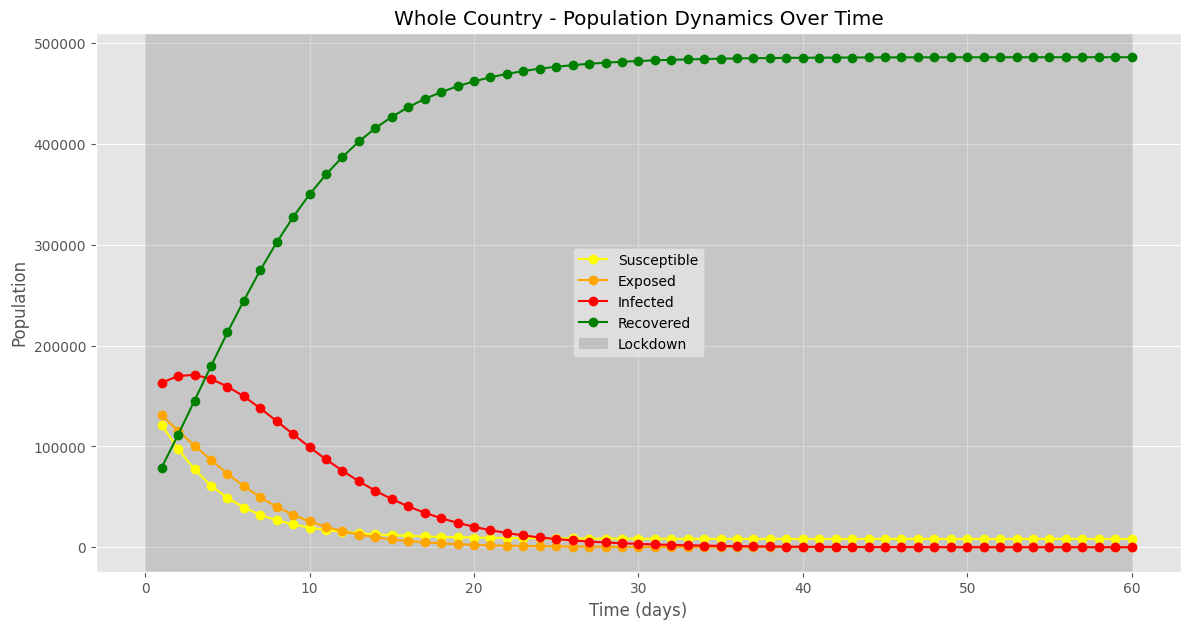

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Configure the style of the graphics
plt.style.use('ggplot')

# Create the figure and axes for the chart
fig, ax = plt.subplots(figsize=(14, 7))

# Draw the lines for the total numbers
ax.plot(country_data_df.index, country_data_df['Susceptible'], label='Susceptible', color='yellow', marker='o')
ax.plot(country_data_df.index, country_data_df['Exposed'], label='Exposed', color='orange', marker='o')
ax.plot(country_data_df.index, country_data_df['Infected'], label='Infected', color='red', marker='o')
ax.plot(country_data_df.index, country_data_df['Recovered'], label='Recovered', color='green', marker='o')

# Add title and tags
ax.set_title('Whole Country - Population Dynamics Over Time')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Population')

# Check if there are affected ports outside “Outside World”.
lockdown_ports = parameters['lockdown_ports']
lockdown_has_non_outside_world_ports = any(
    port not in parameters['ports_according_communities']['Outside World'] for port in lockdown_ports
)

# Highlight the lockdown period if applicable
if lockdown_has_non_outside_world_ports:
    lockdown_start = parameters['ls'] - 1  # Adjust for zero-based indexing
    lockdown_end = parameters['le'] + lockdown_start
    ax.axvspan(lockdown_start, lockdown_end, color='grey', alpha=0.3, label='Lockdown')

# Add the legend
ax.legend()

# Display the graph
plt.show()

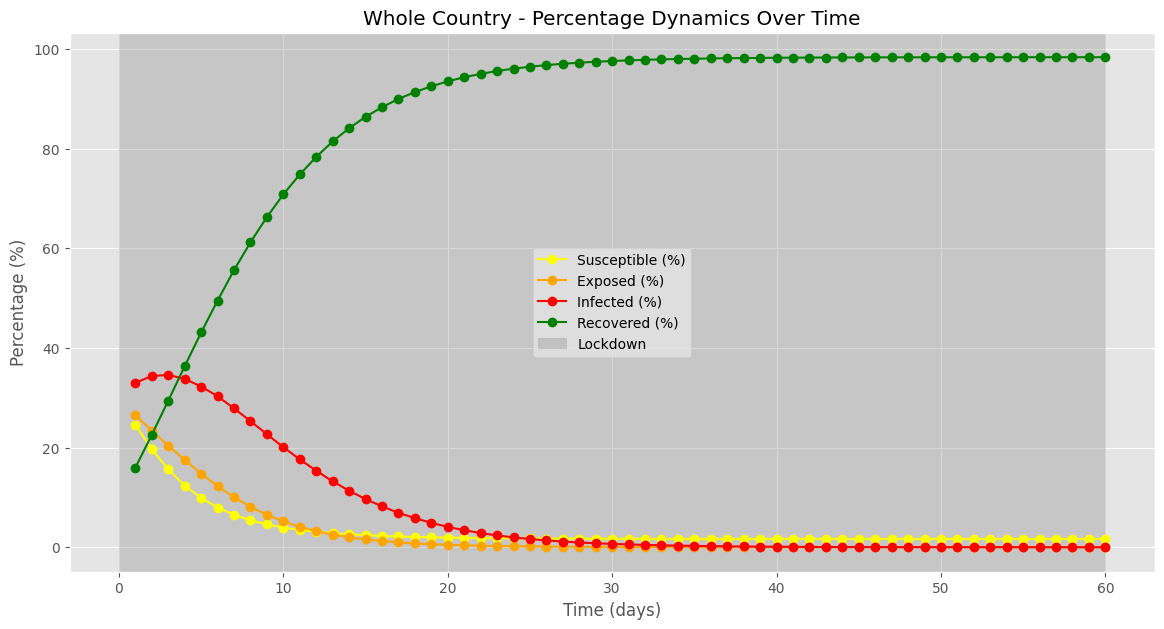

In [28]:
# Create the figure and axes for the chart
fig, ax = plt.subplots(figsize=(14, 7))

# Draw the lines for the percentages
ax.plot(country_data_df.index, country_data_df['Susceptible (%)'], label='Susceptible (%)', color='yellow', marker='o')
ax.plot(country_data_df.index, country_data_df['Exposed (%)'], label='Exposed (%)', color='orange', marker='o')
ax.plot(country_data_df.index, country_data_df['Infected (%)'], label='Infected (%)', color='red', marker='o')
ax.plot(country_data_df.index, country_data_df['Recovered (%)'], label='Recovered (%)', color='green', marker='o')

# Add title and tags
ax.set_title('Whole Country - Percentage Dynamics Over Time')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Percentage (%)')

# Check if there are affected ports outside “Outside World”.
lockdown_ports = parameters['lockdown_ports']
lockdown_has_non_outside_world_ports = any(
    port not in parameters['ports_according_communities']['Outside World'] for port in lockdown_ports
)

# Highlight the lockdown period if applicable
if lockdown_has_non_outside_world_ports:
    lockdown_start = parameters['ls'] - 1  # Adjust for zero-based indexing
    lockdown_end = parameters['le'] + lockdown_start
    ax.axvspan(lockdown_start, lockdown_end, color='grey', alpha=0.3, label='Lockdown')

# Add the legend
ax.legend()

# Display the graph
plt.show()


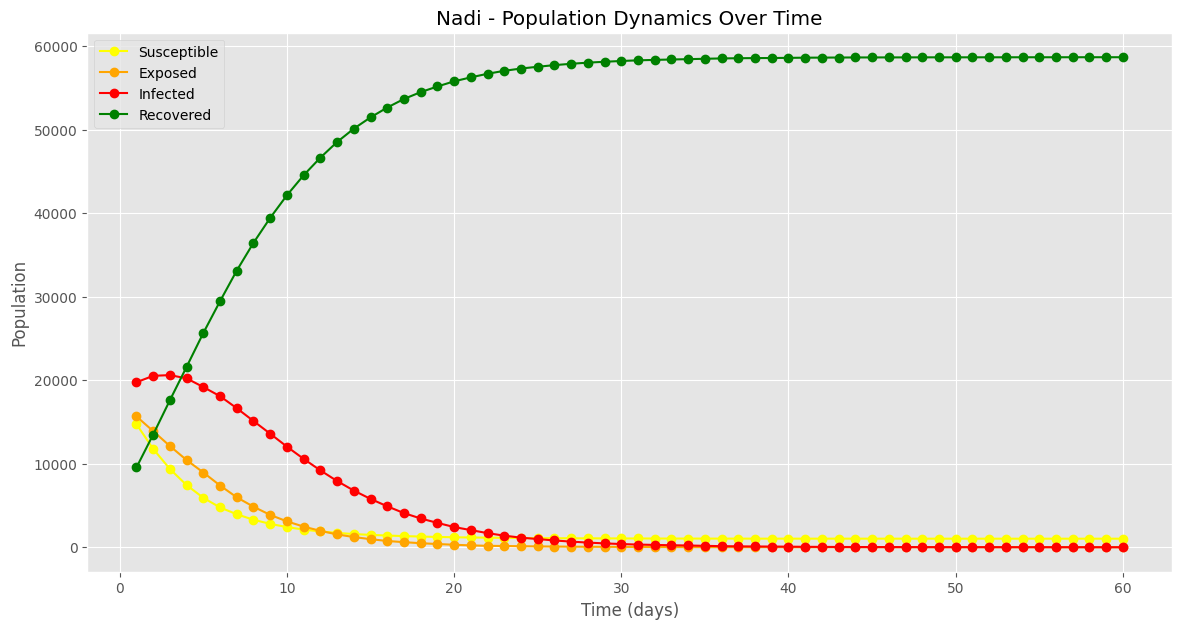

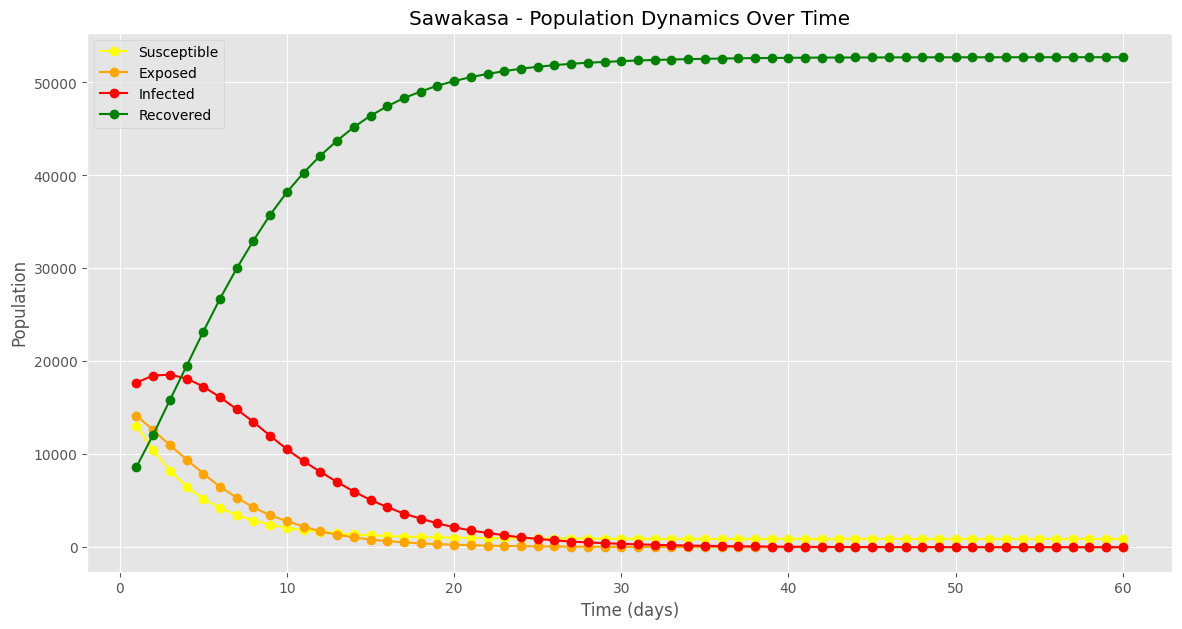

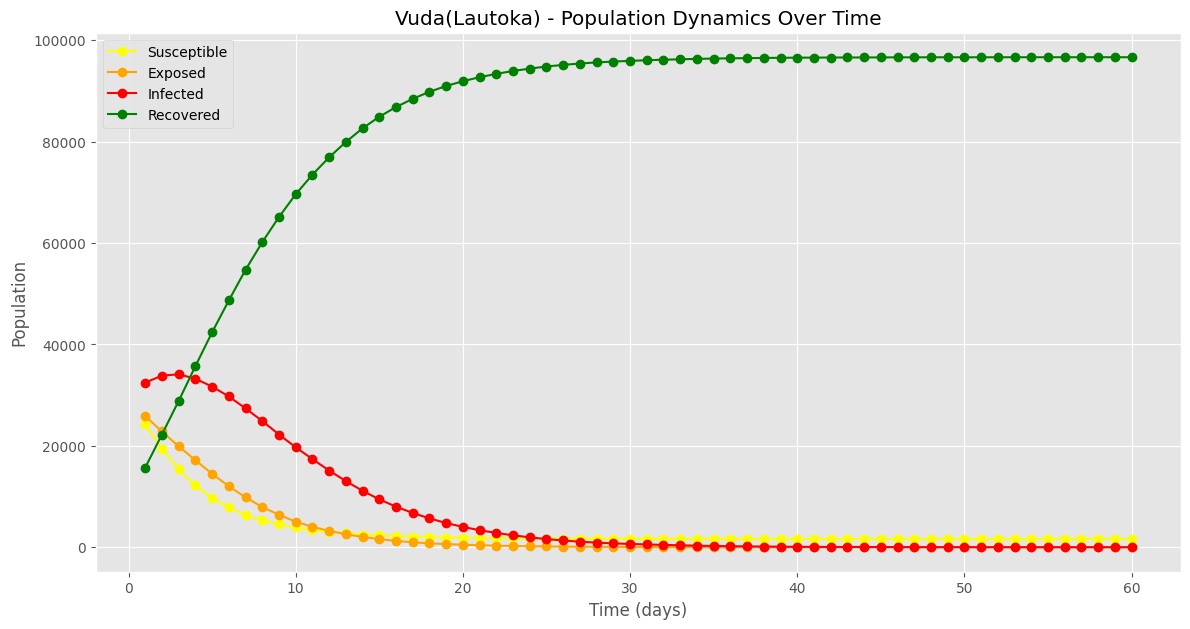

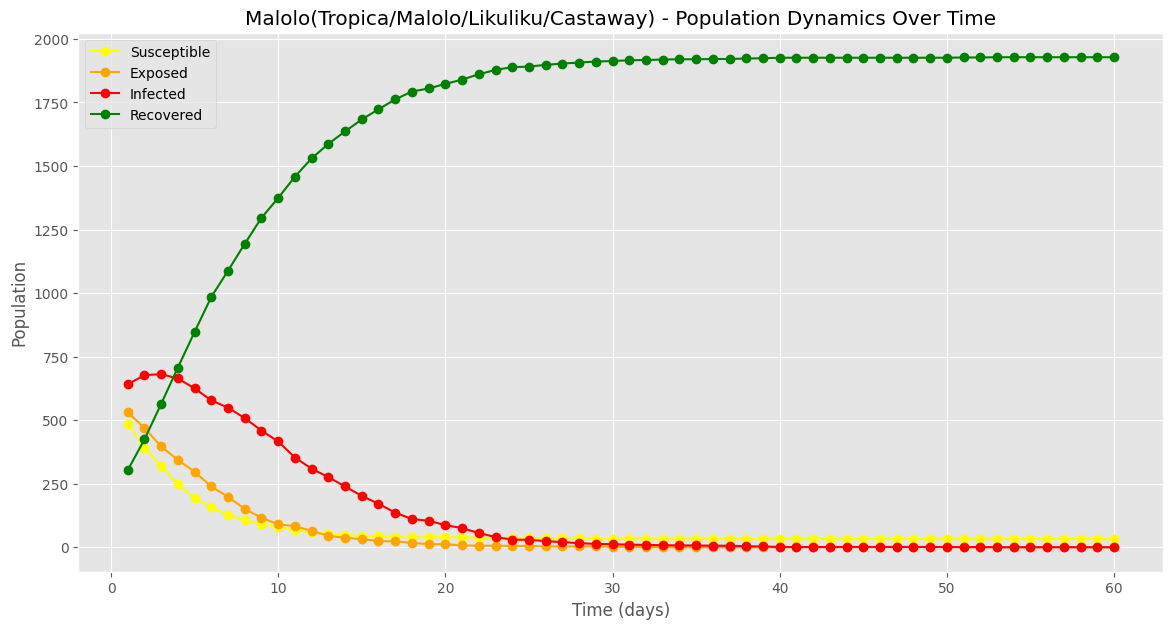

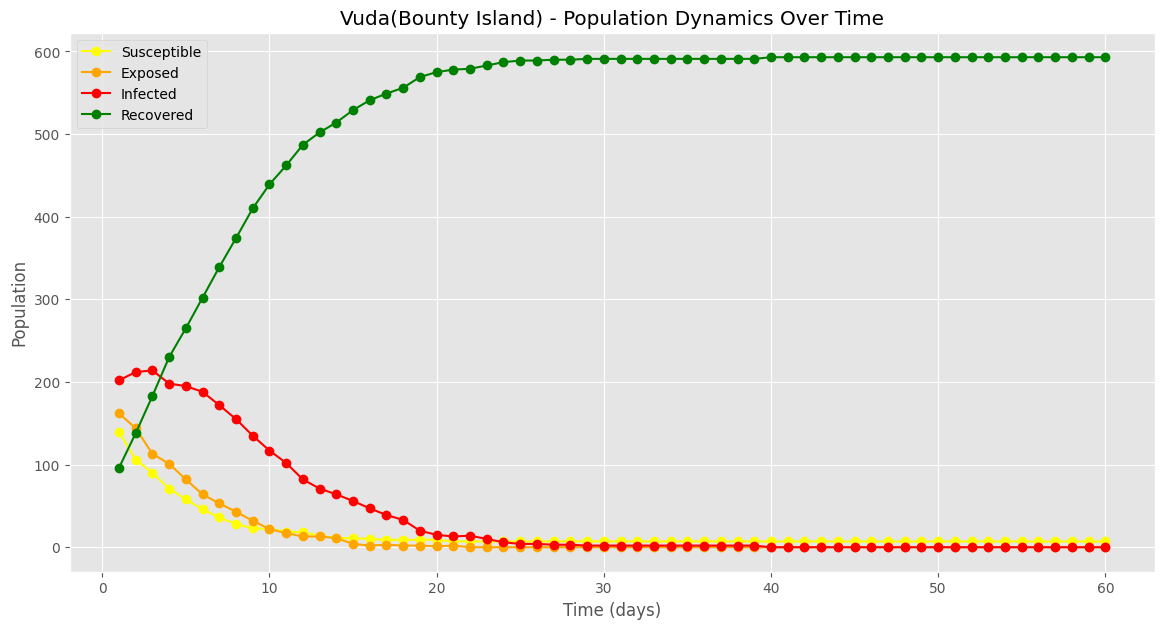

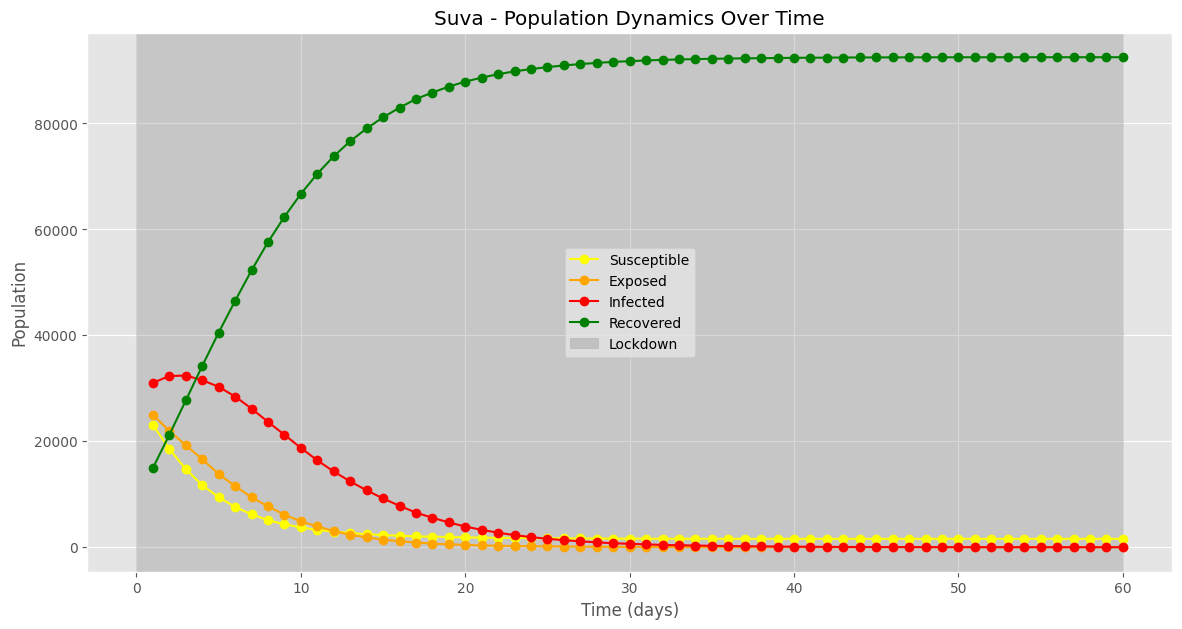

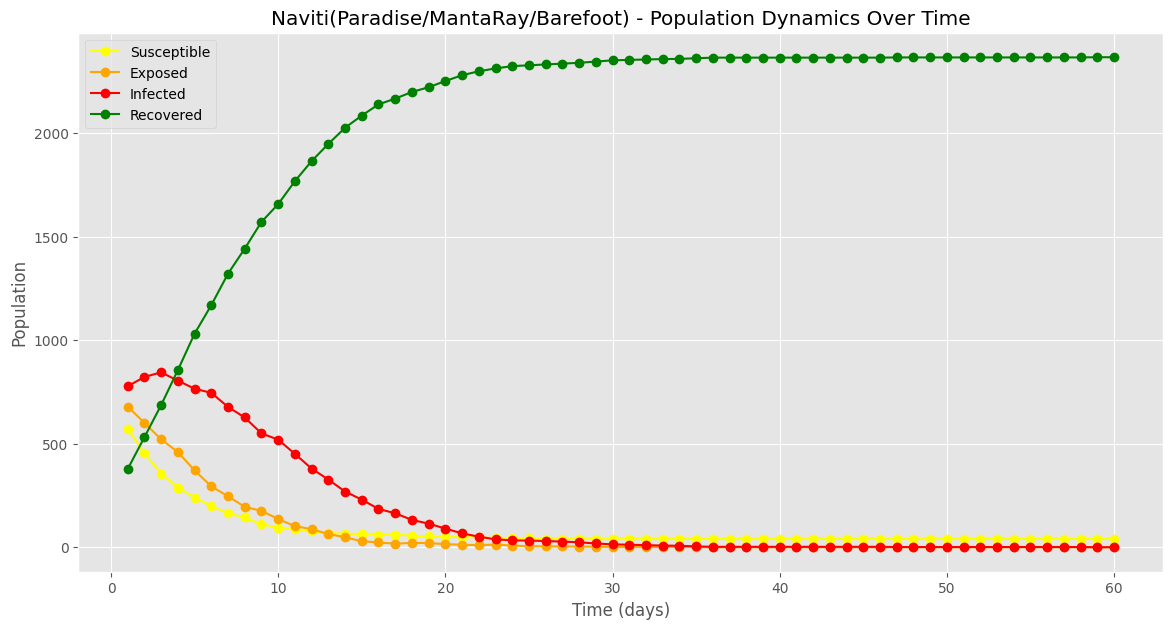

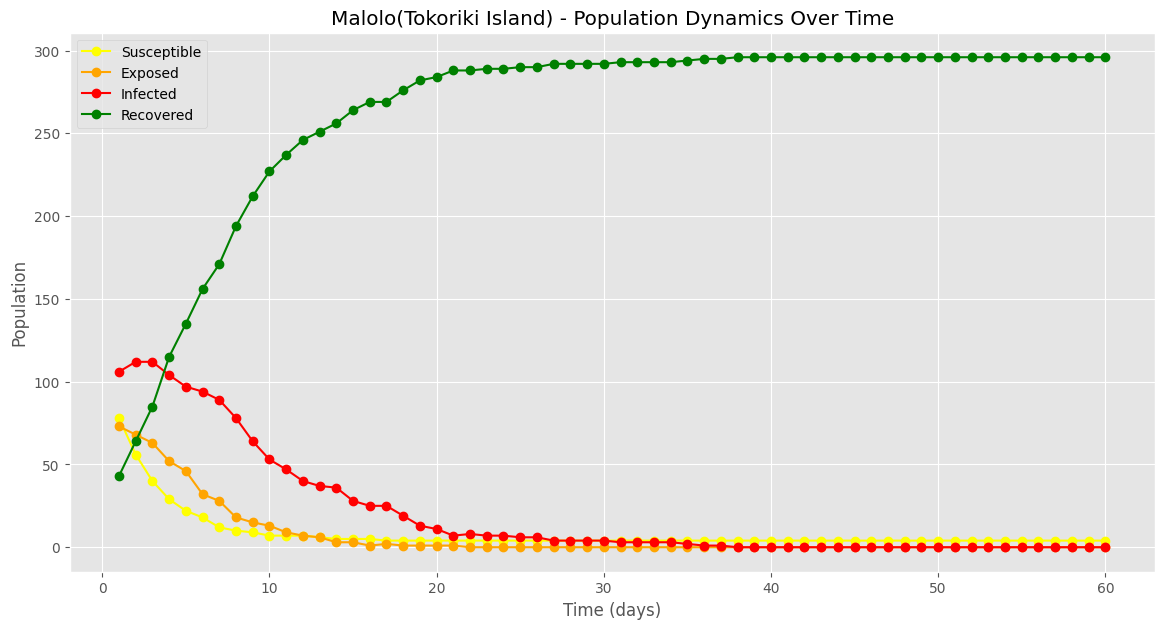

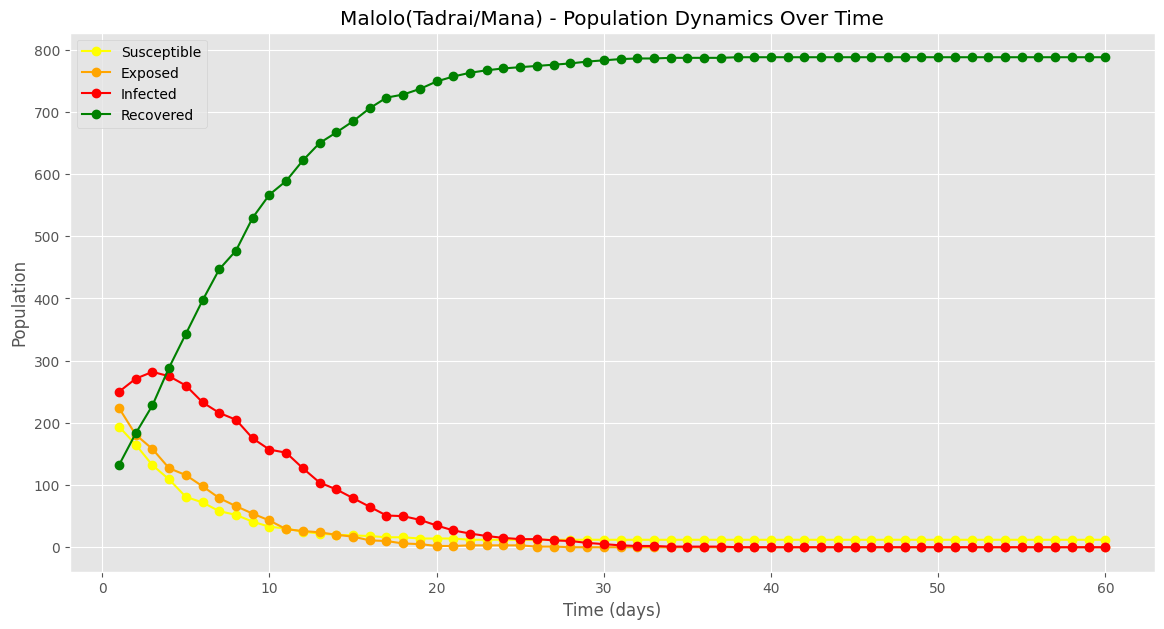

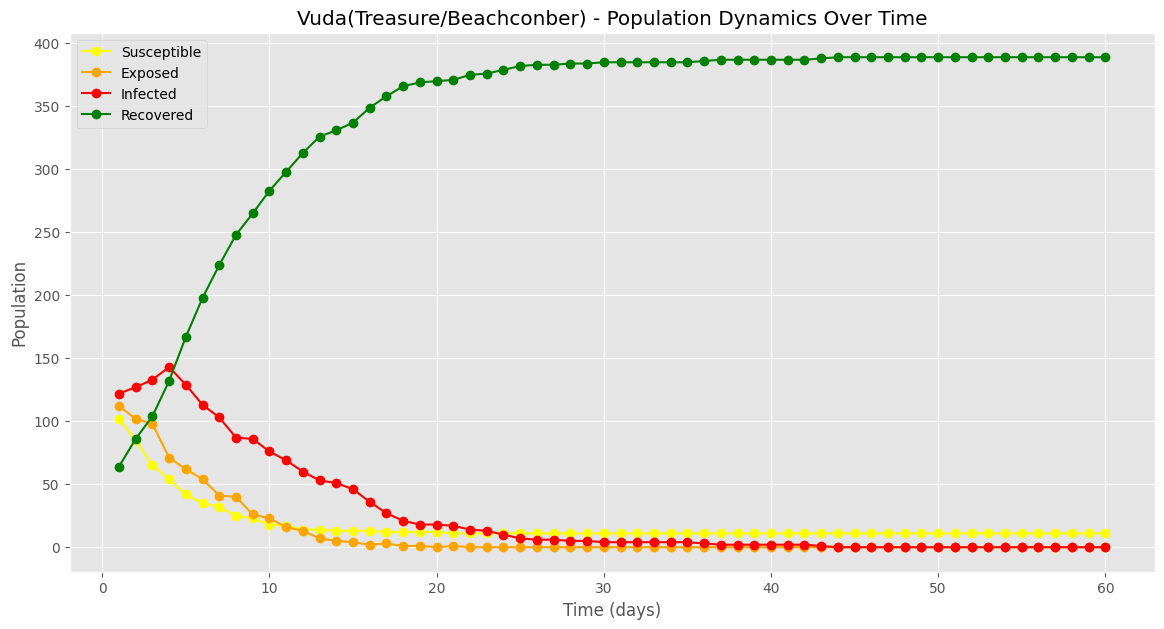

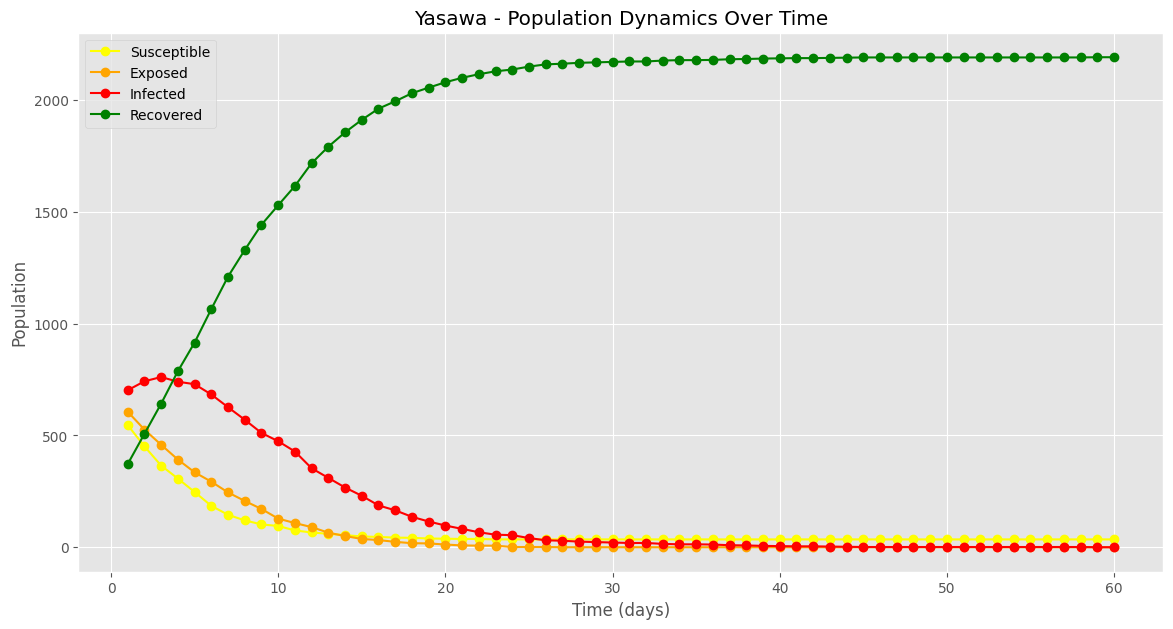

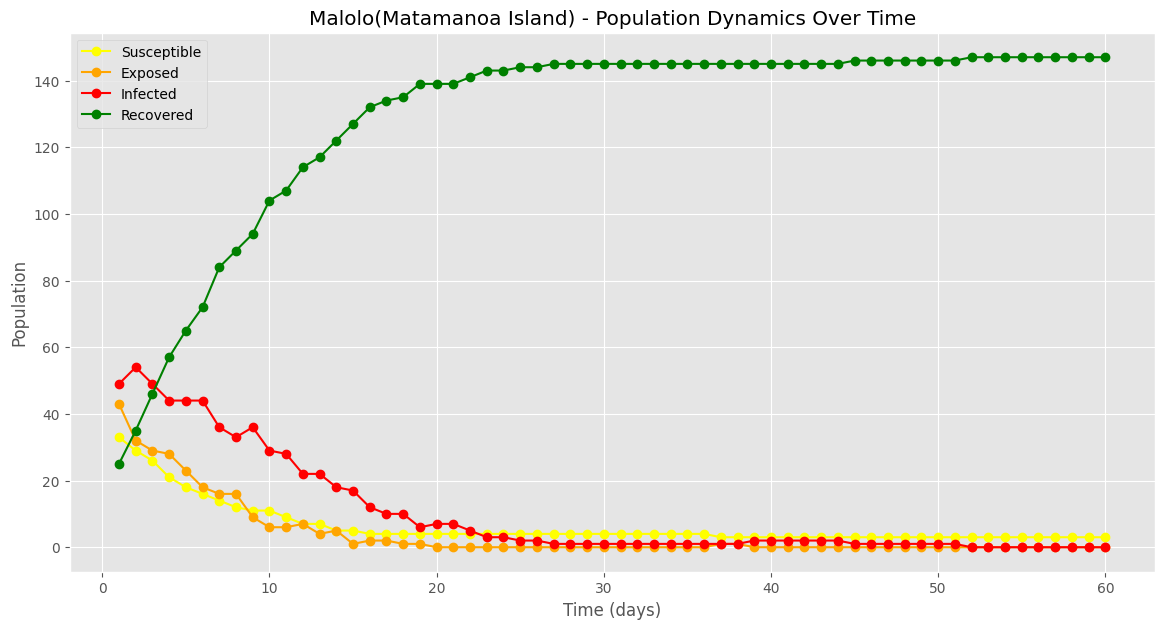

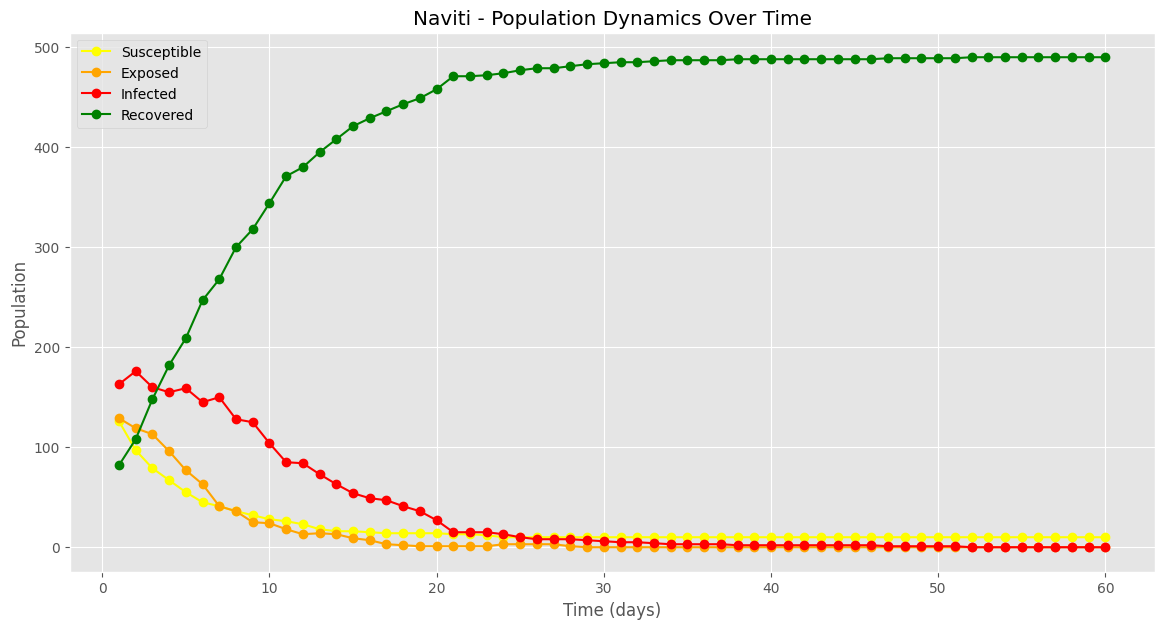

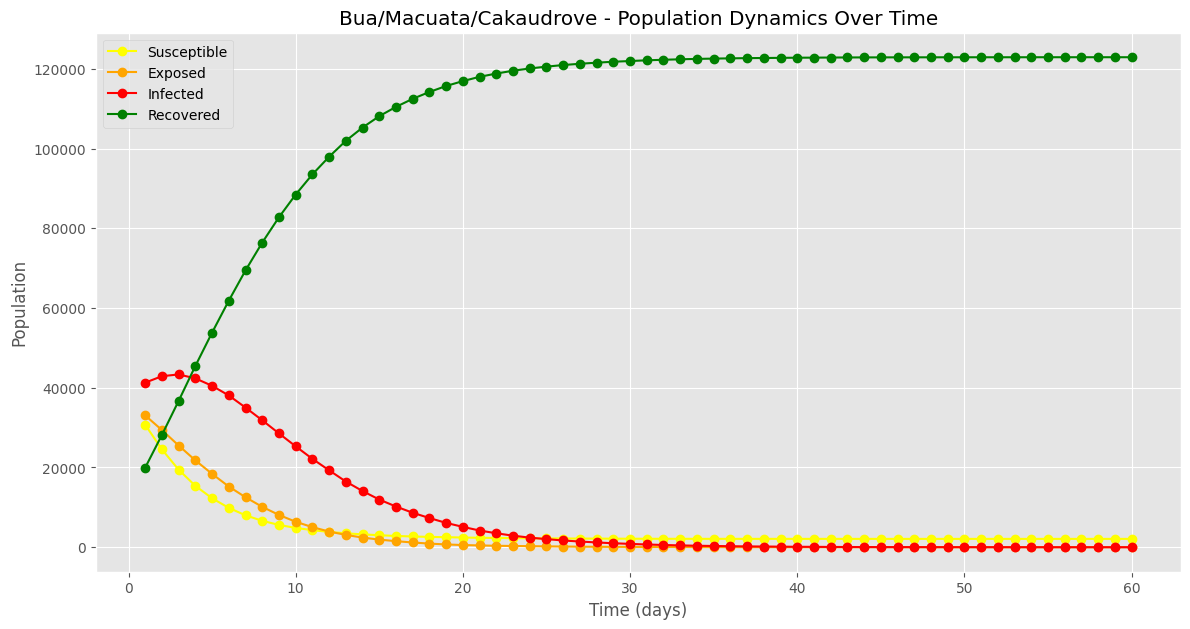

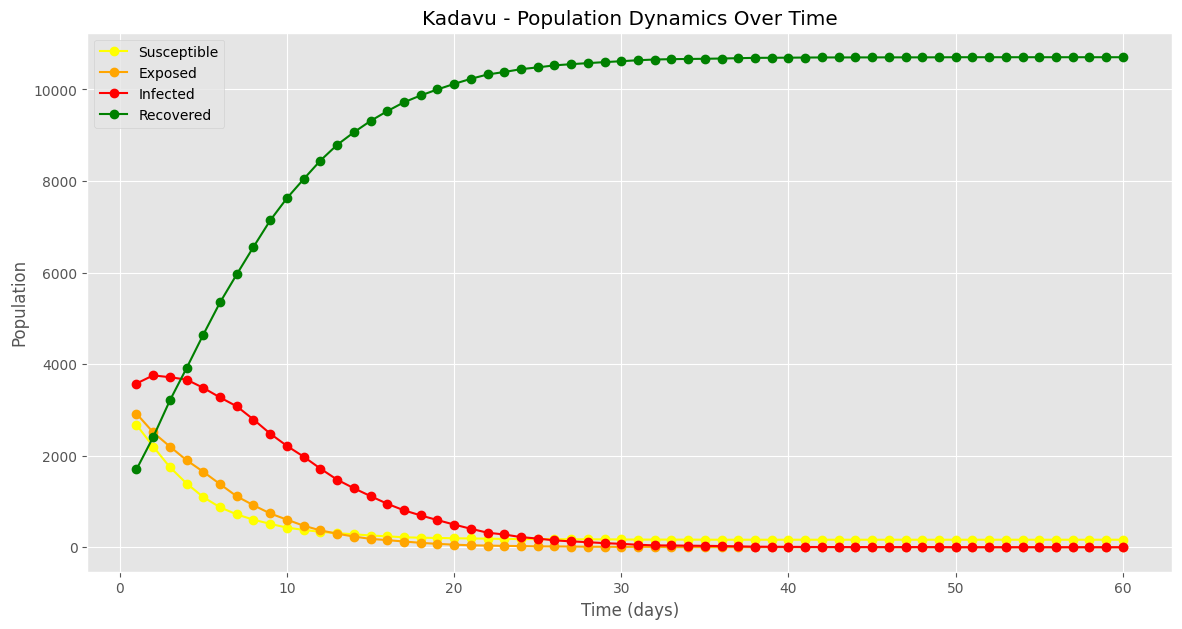

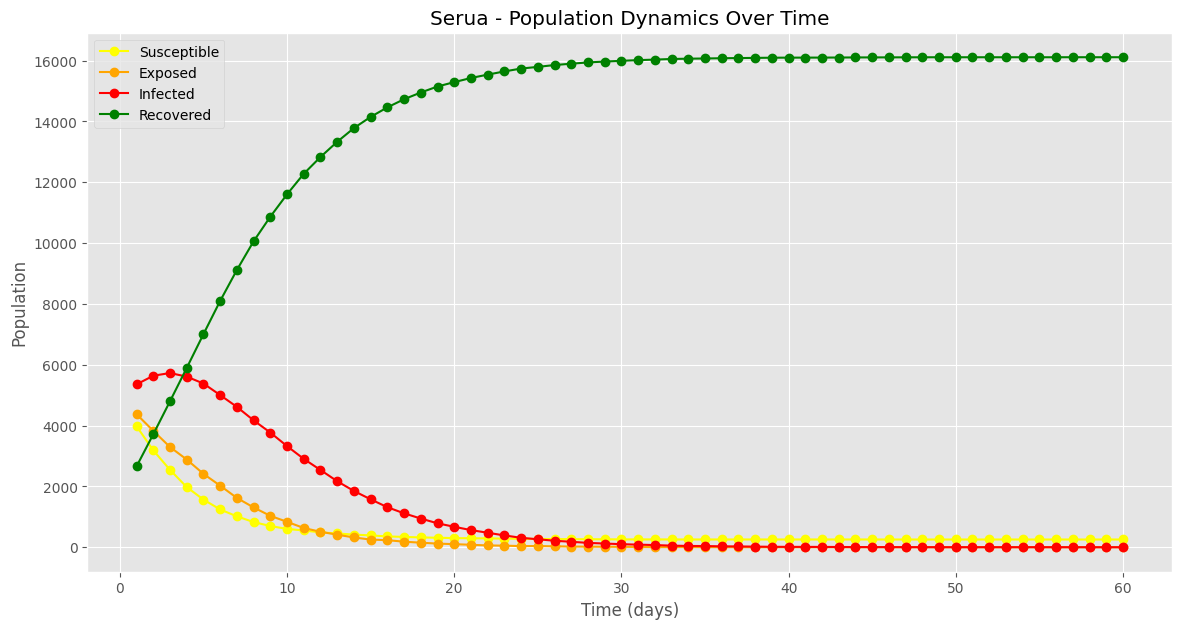

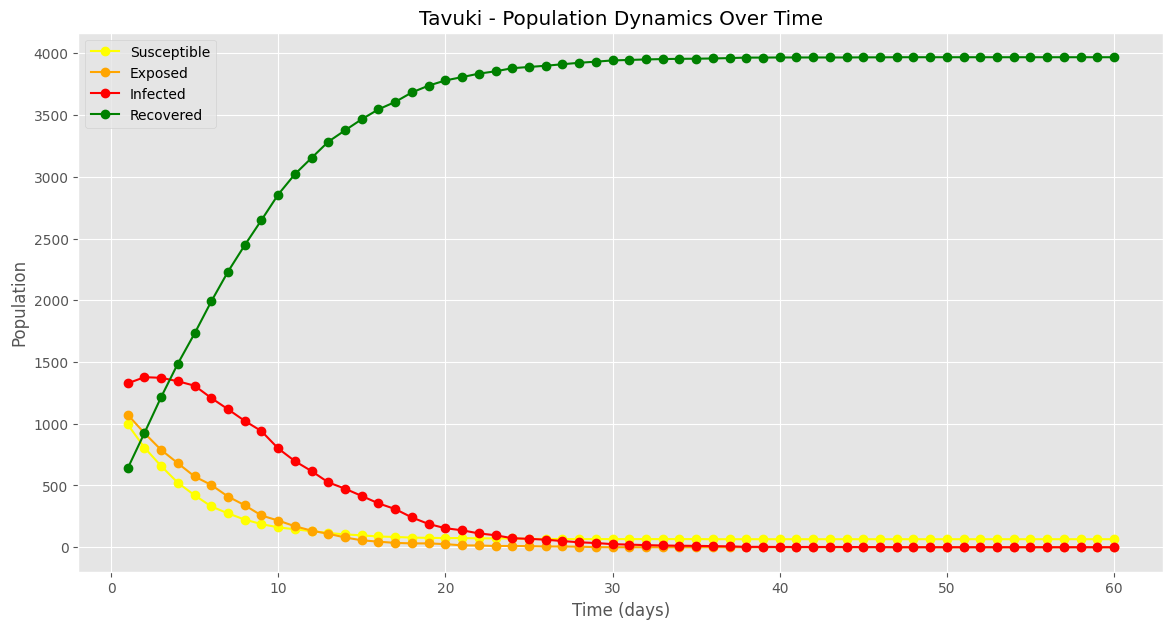

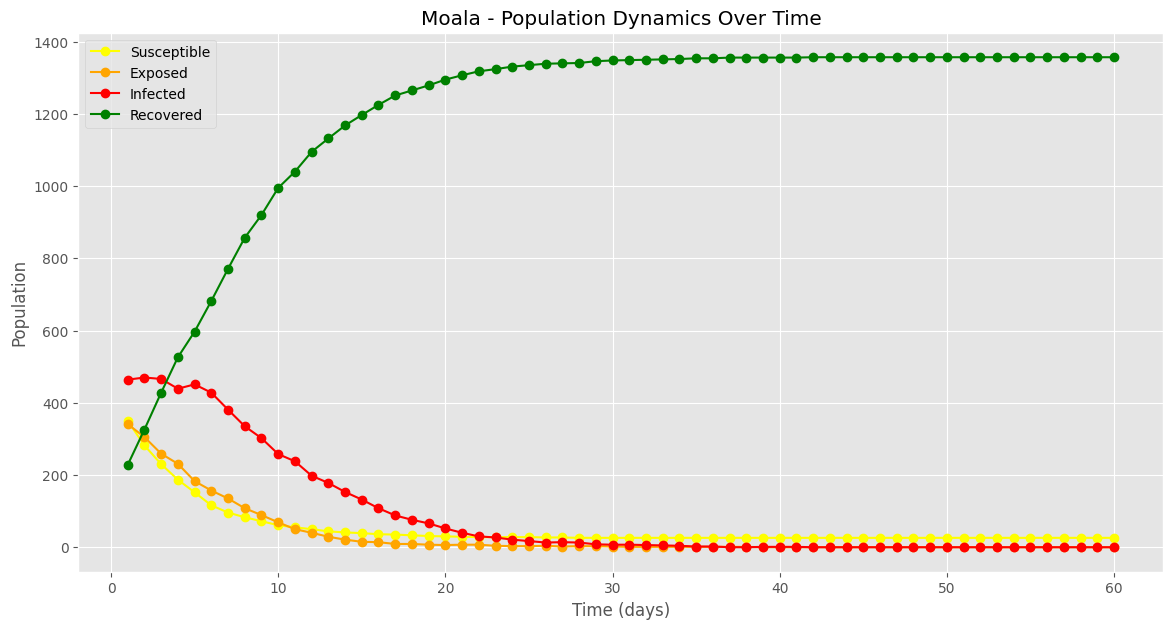

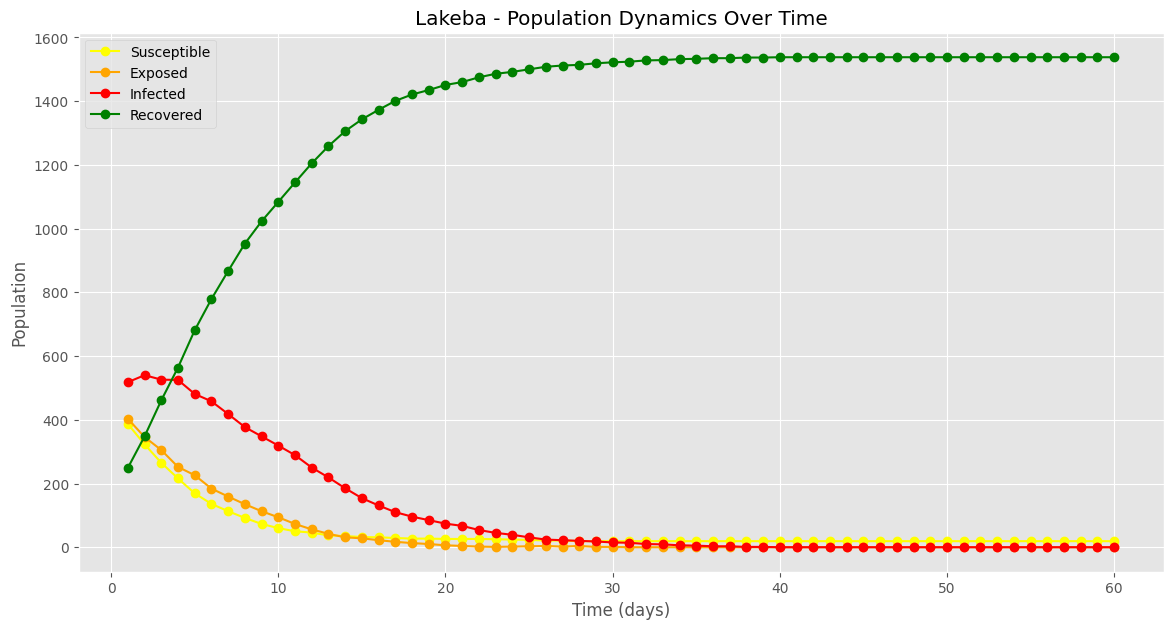

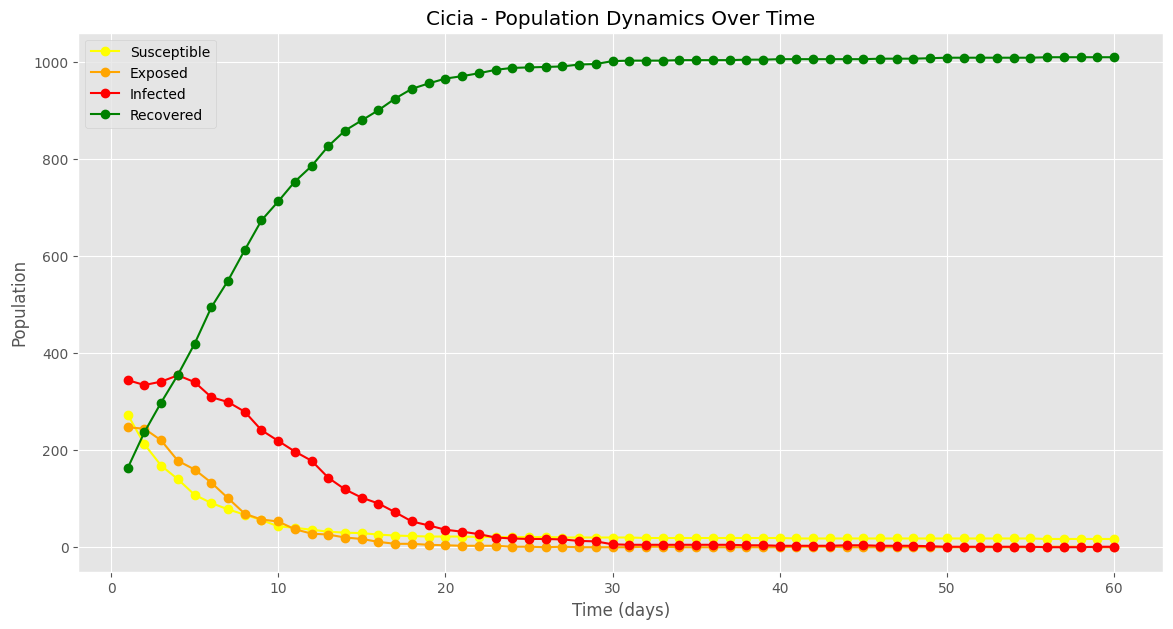

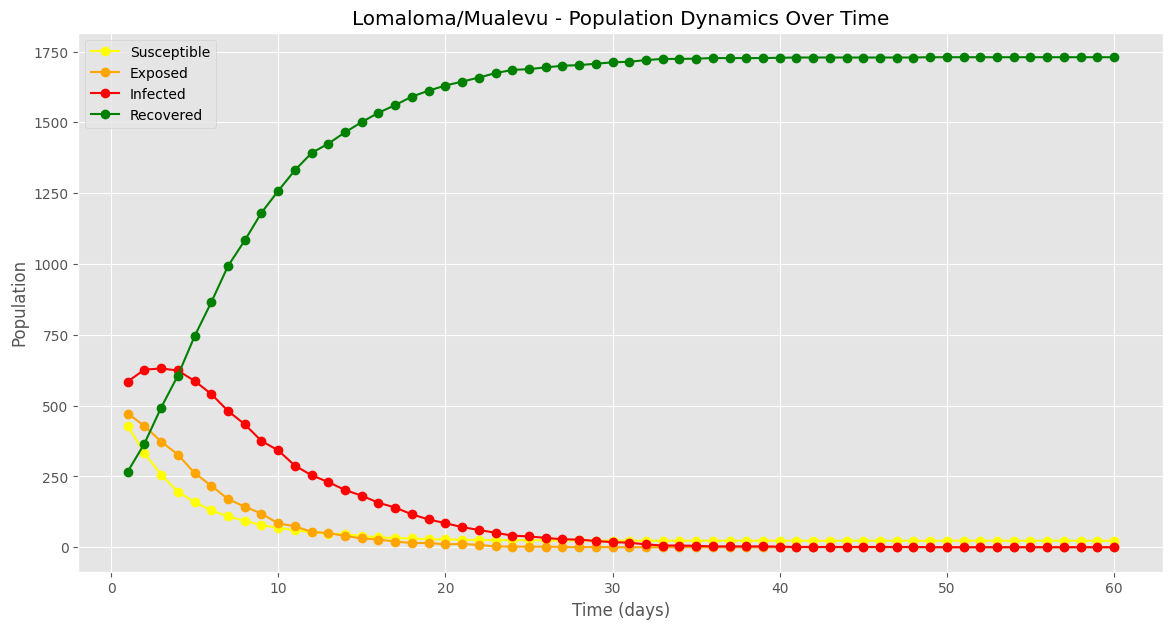

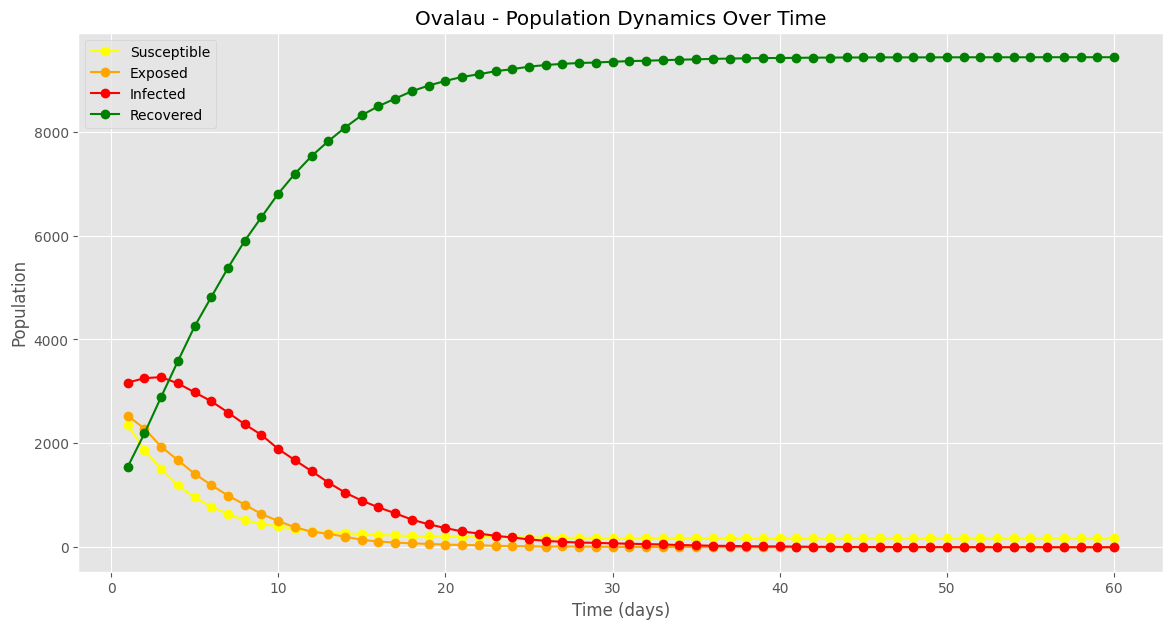

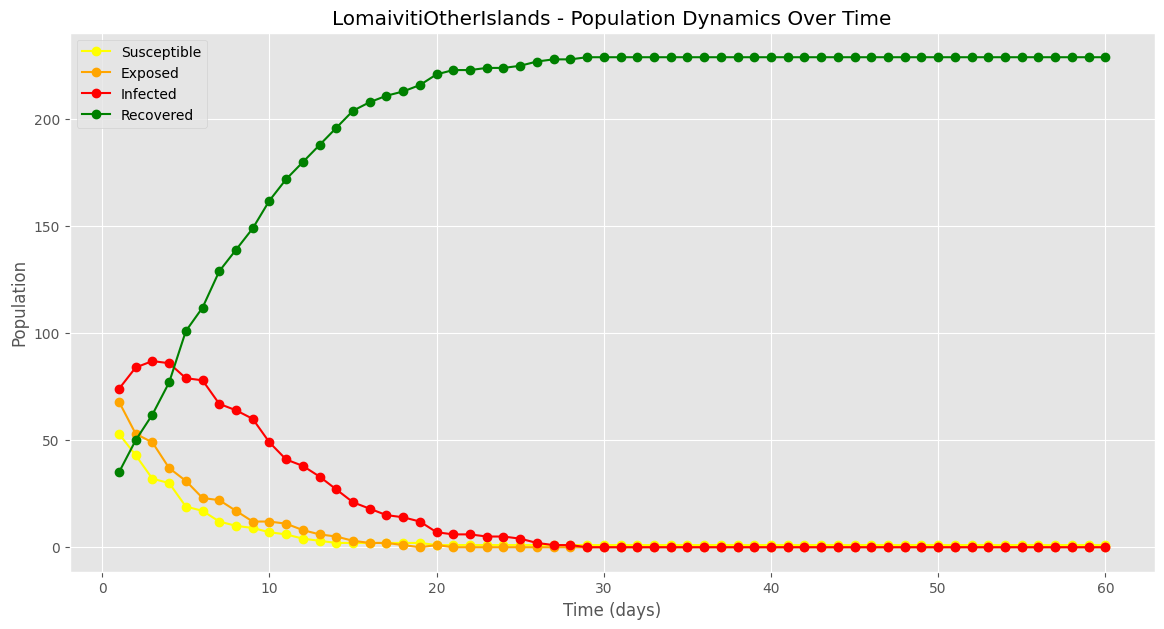

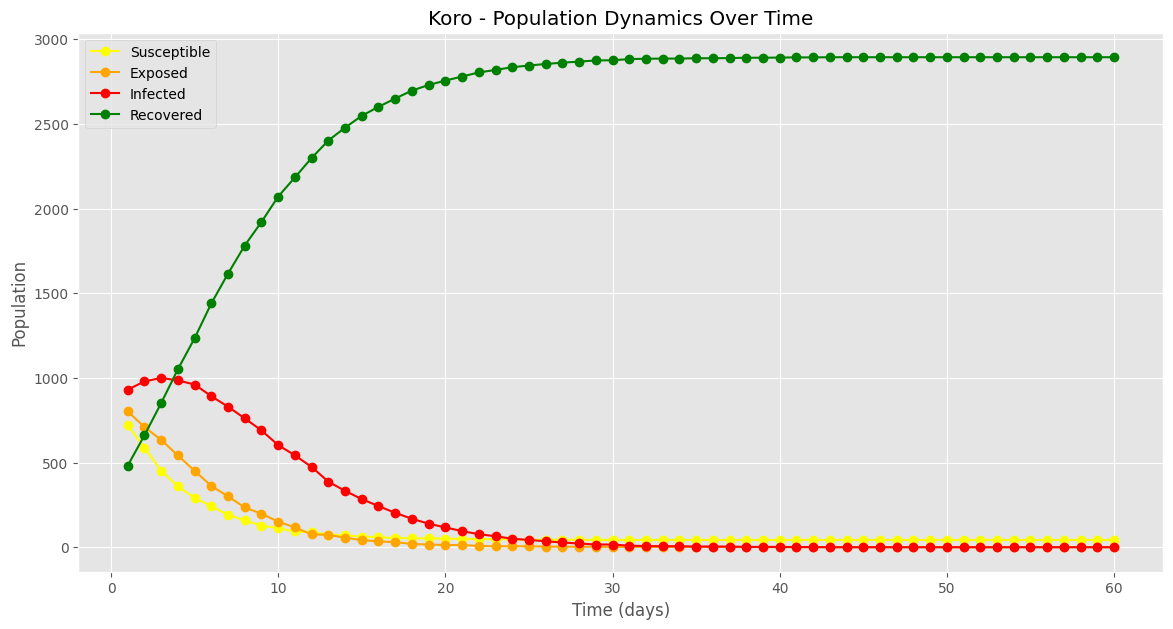

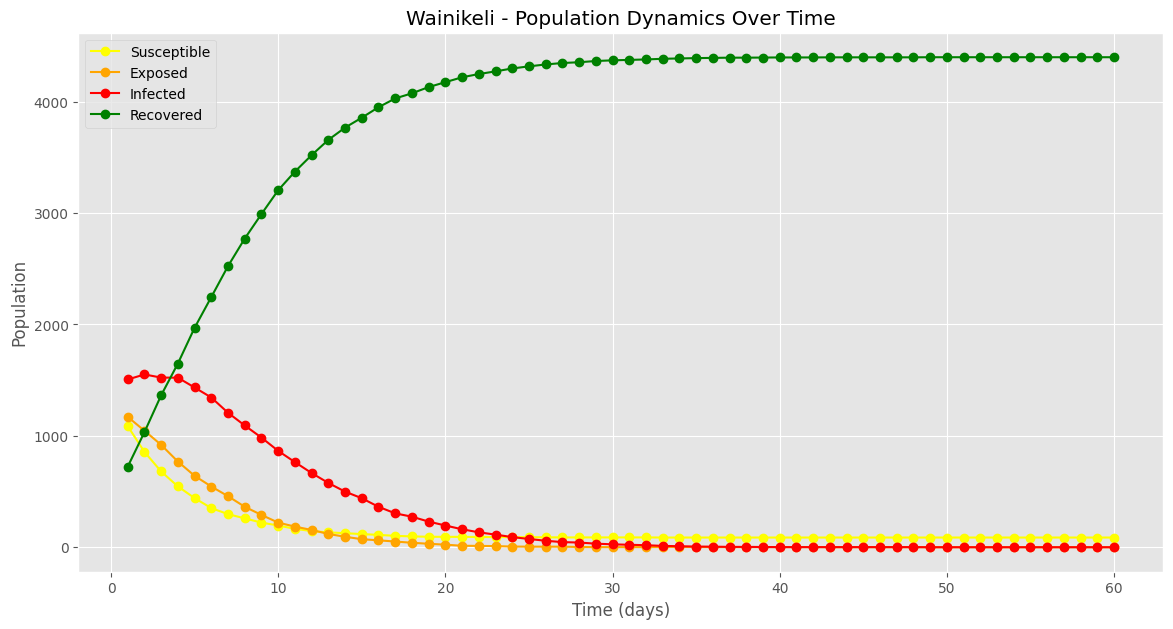

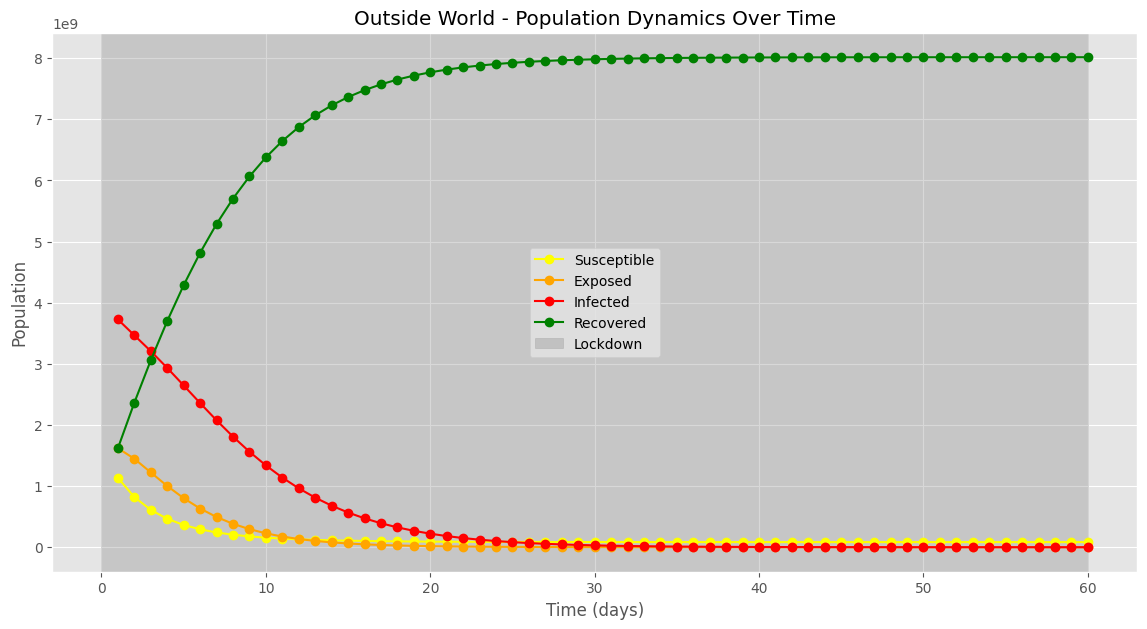

In [30]:
# Labels for population categories
compartment_labels = ['Susceptible', 'Exposed', 'Infected', 'Recovered']
compartment_colors = ['yellow', 'orange', 'red', 'green']

# Obtain the communities affected by the lockdown
lockdown_ports_set = set(parameters['lockdown_ports'])
affected_communities = {port_to_community[port] for port in lockdown_ports_set if port in port_to_community}

# Itera on each community to create a graph
for i, community_name in enumerate(communities_ordered):
    # Crear la figura para cada comunidad
    plt.figure(figsize=(14, 7))

    # Extract the data of each compartment for the current community.
    for j, (label, color) in enumerate(zip(compartment_labels, compartment_colors)):
        compartment_history = [day_array[i, j] for day_array in history]  
        plt.plot(days, compartment_history, label=label, color=color, marker='o')

    # Adjust the axes and add title and labels
    plt.title(f"{community_name} - Population Dynamics Over Time")
    plt.xlabel("Time (days)")
    plt.ylabel("Population")
    
    # Highlight the lockdown period for affected communities only.
    if community_name in affected_communities:
        plt.axvspan(lockdown_start, lockdown_end, color='grey', alpha=0.3, label='Lockdown')

    # Add legend
    plt.legend()

    # Display the graph
    plt.show()


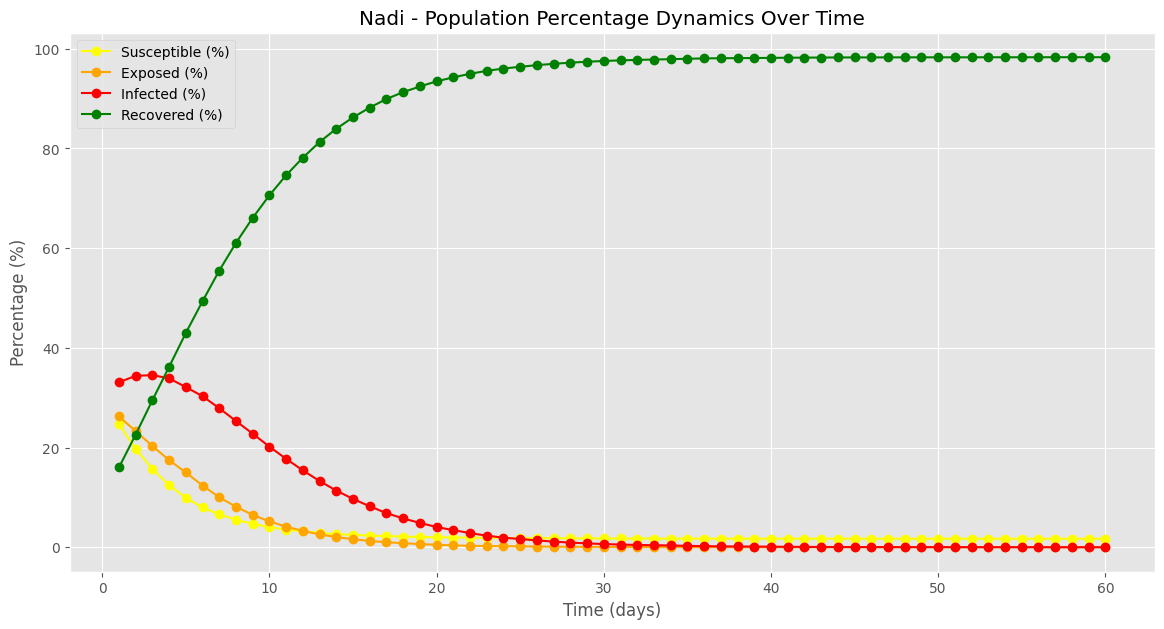

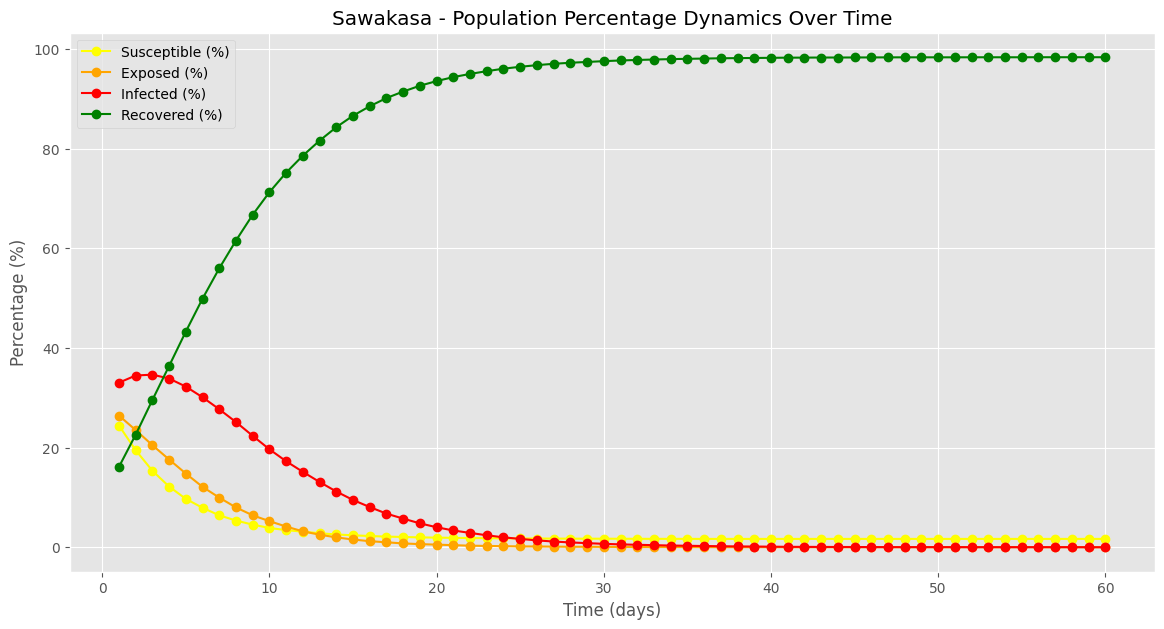

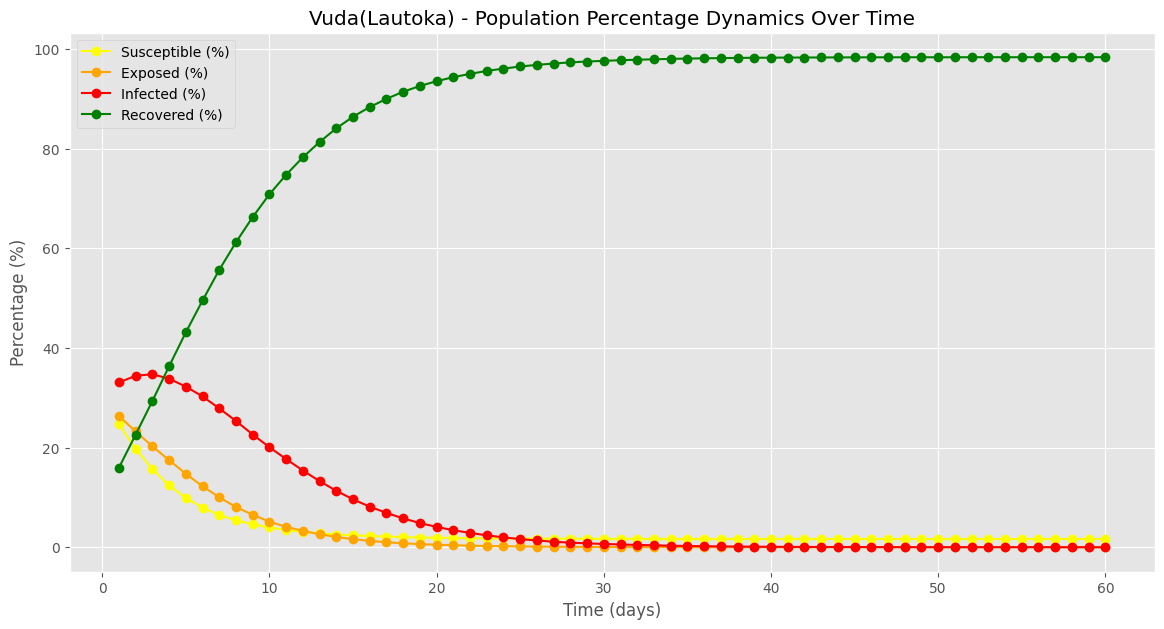

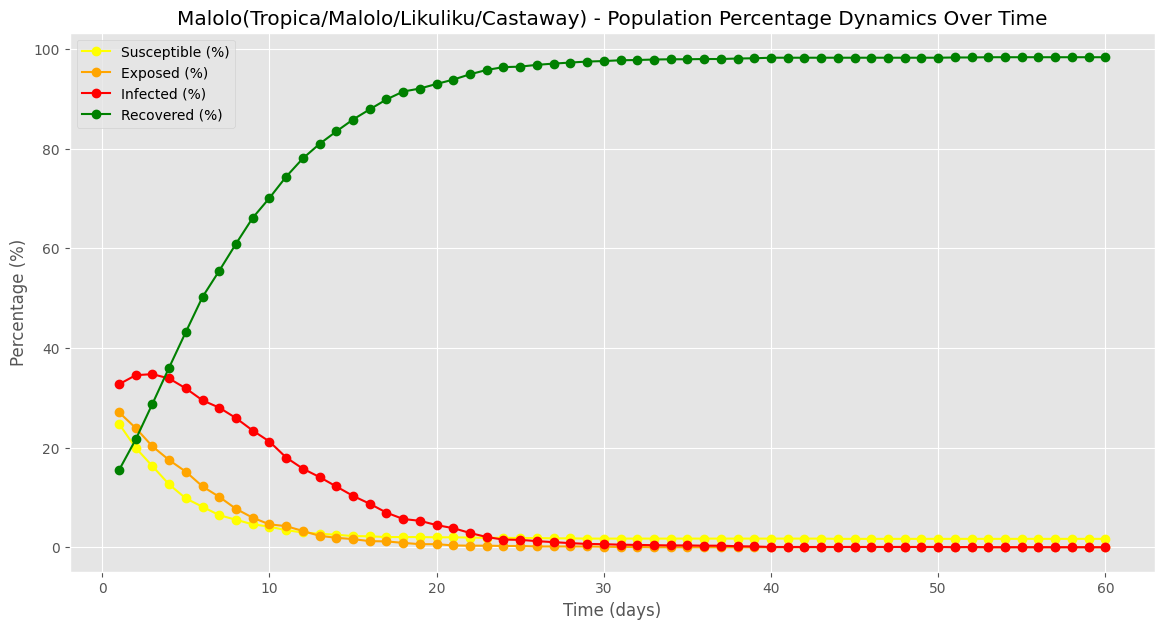

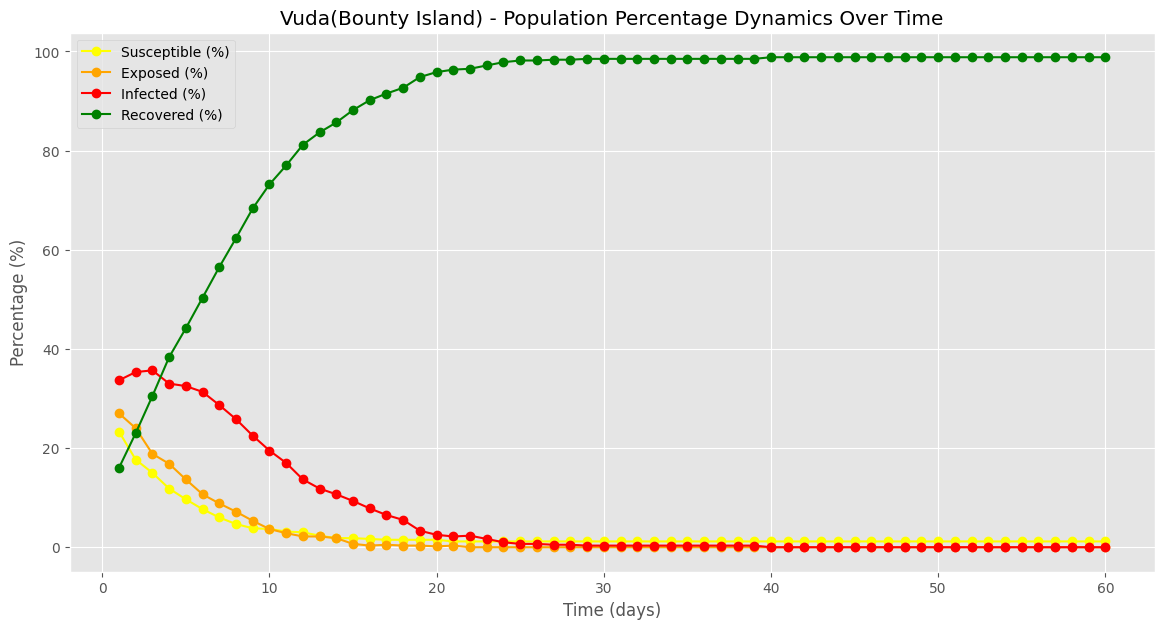

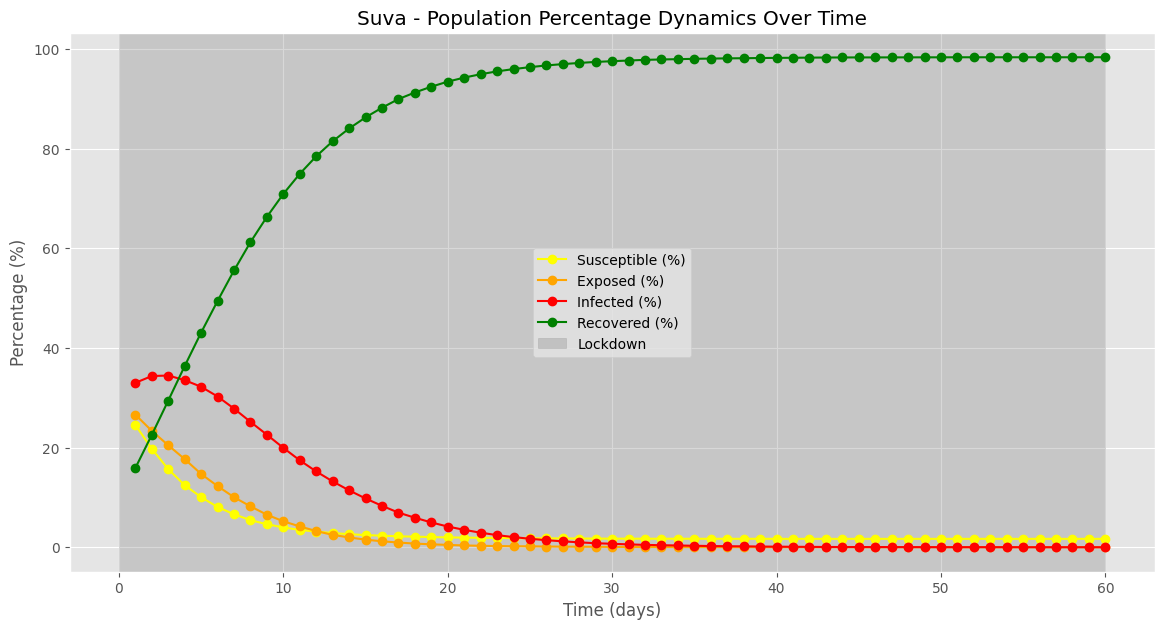

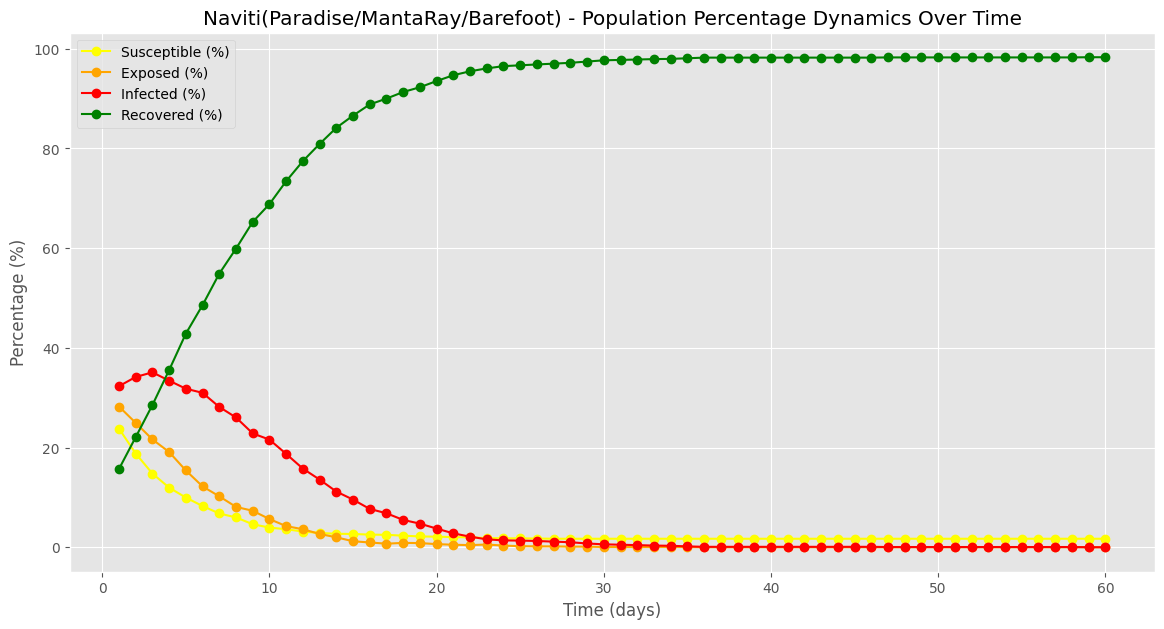

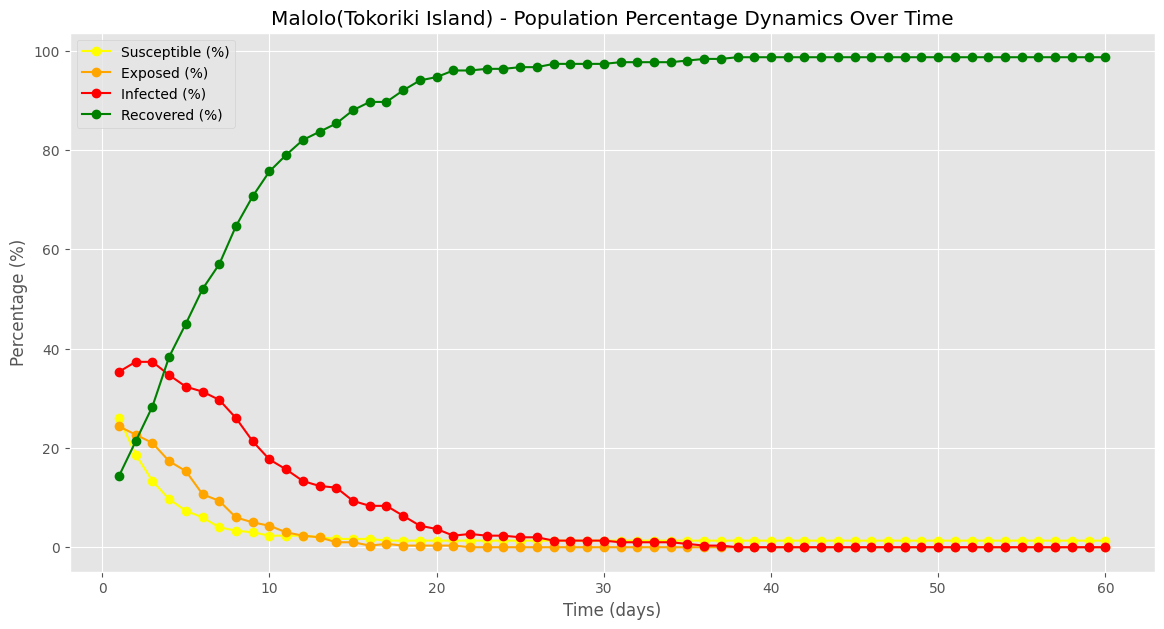

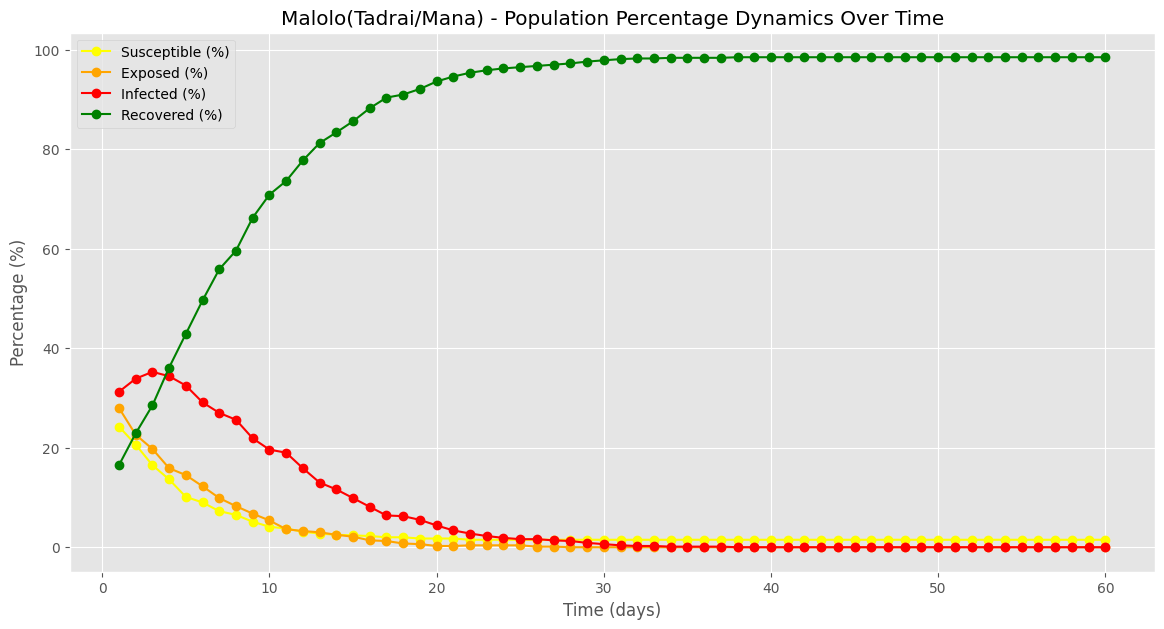

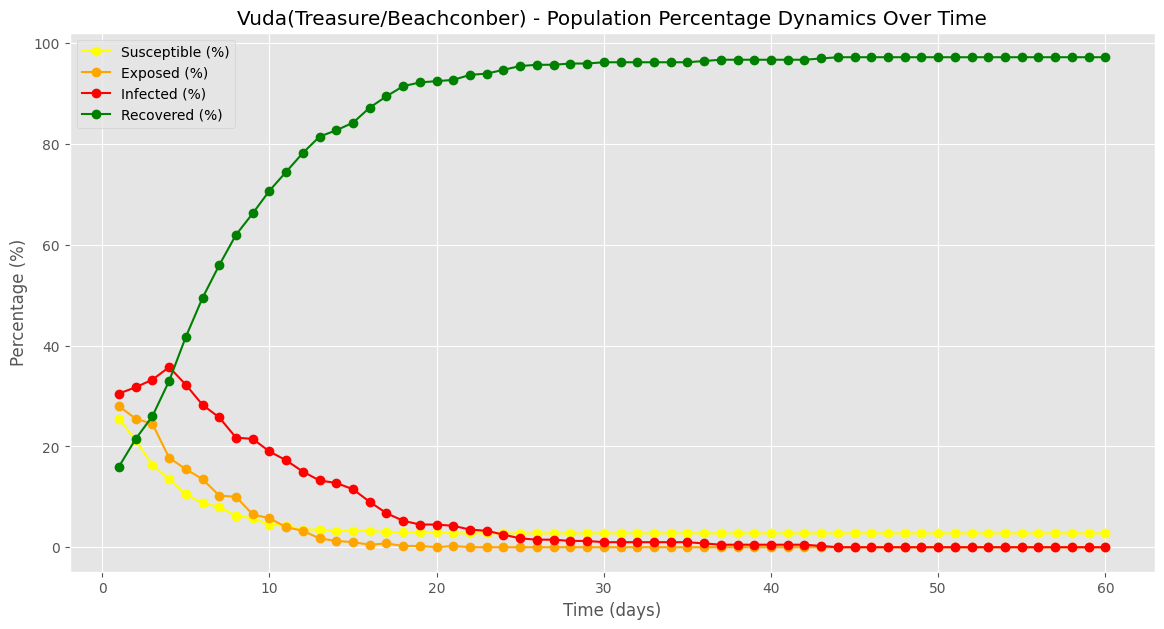

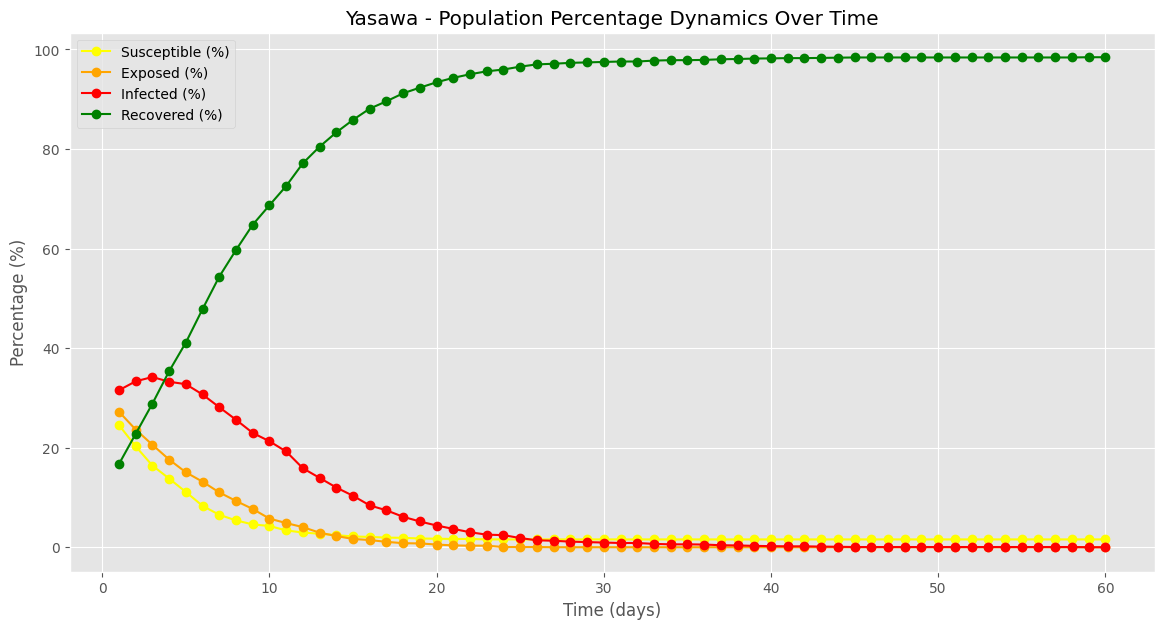

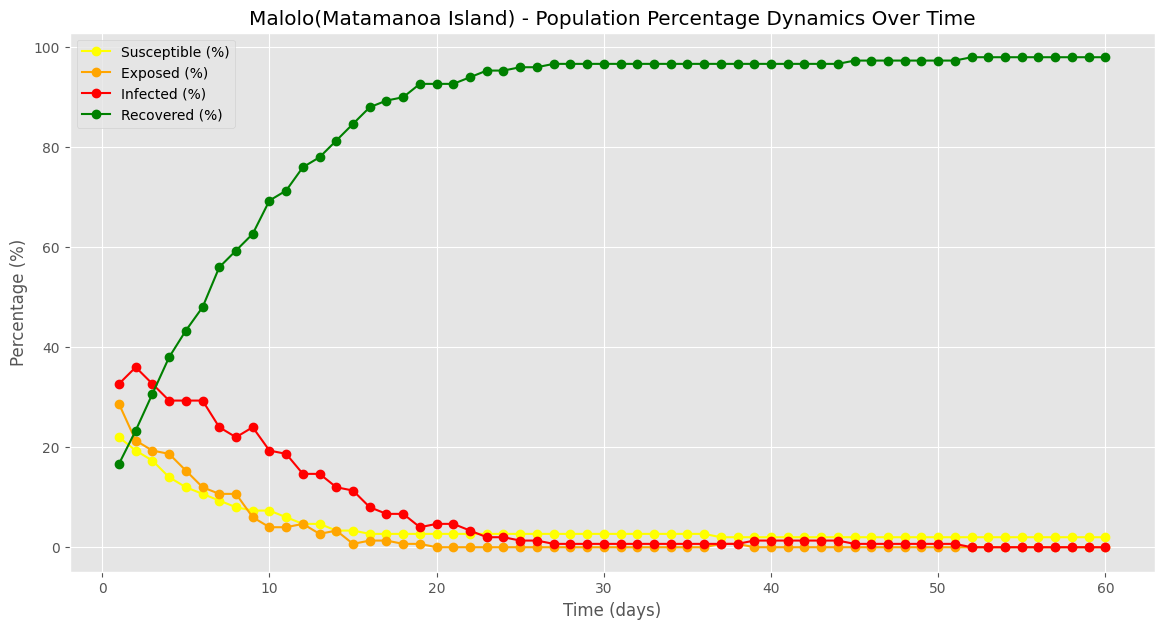

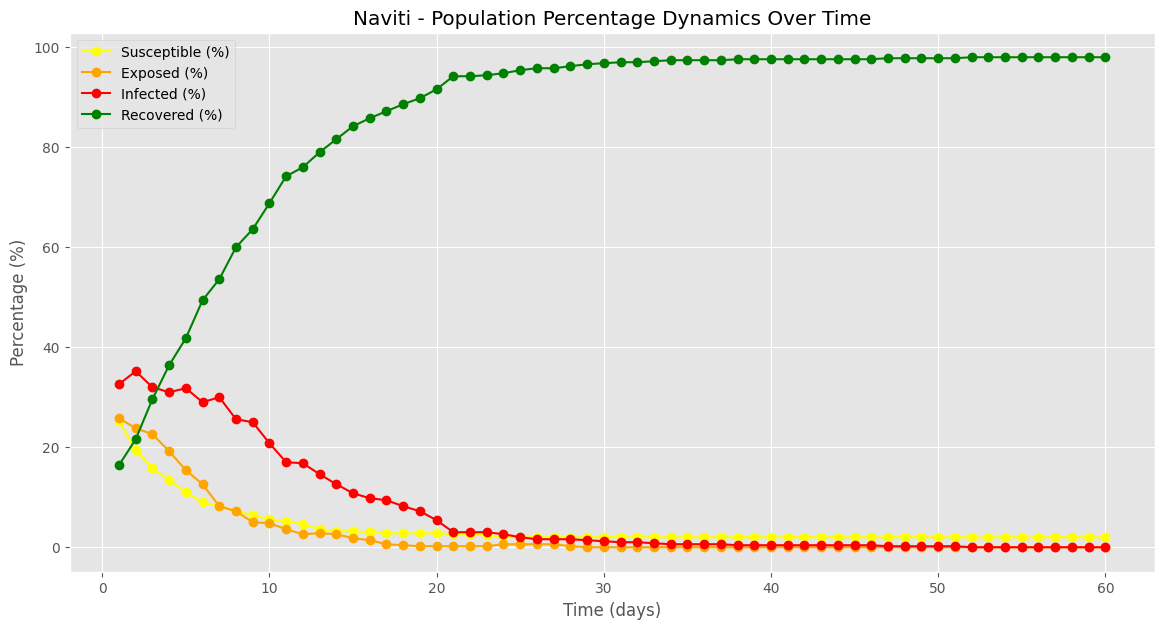

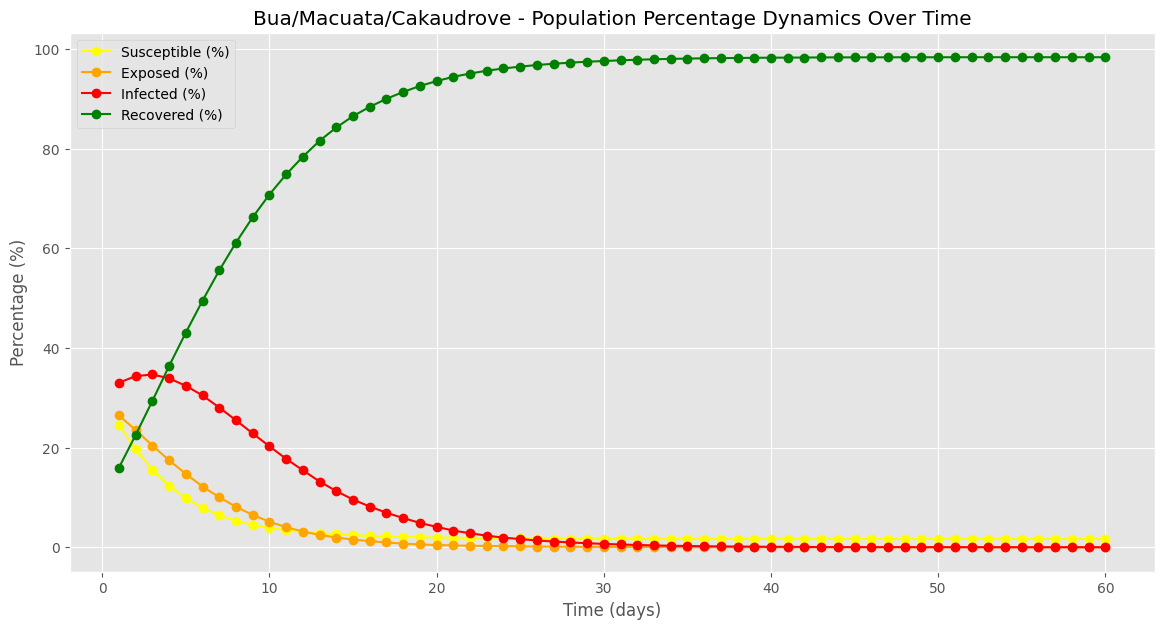

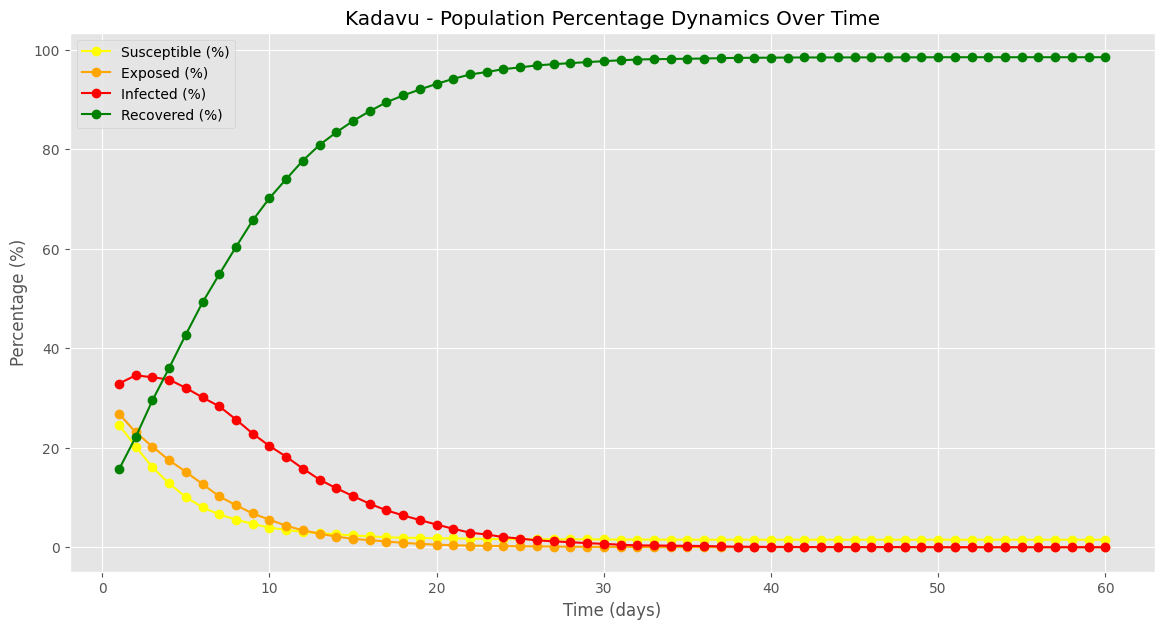

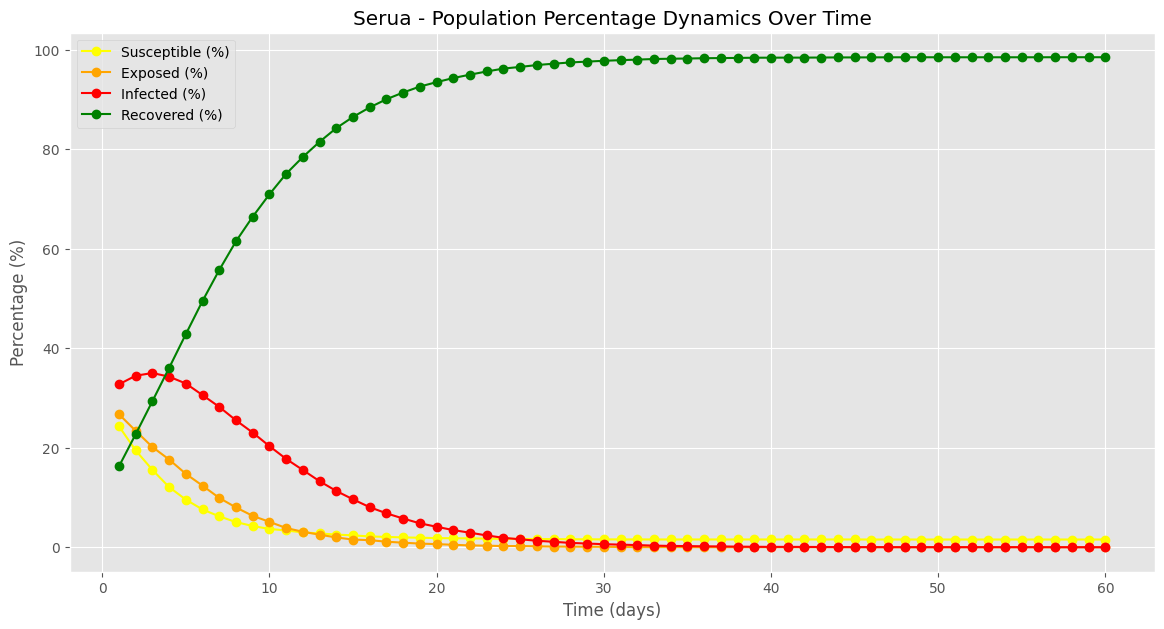

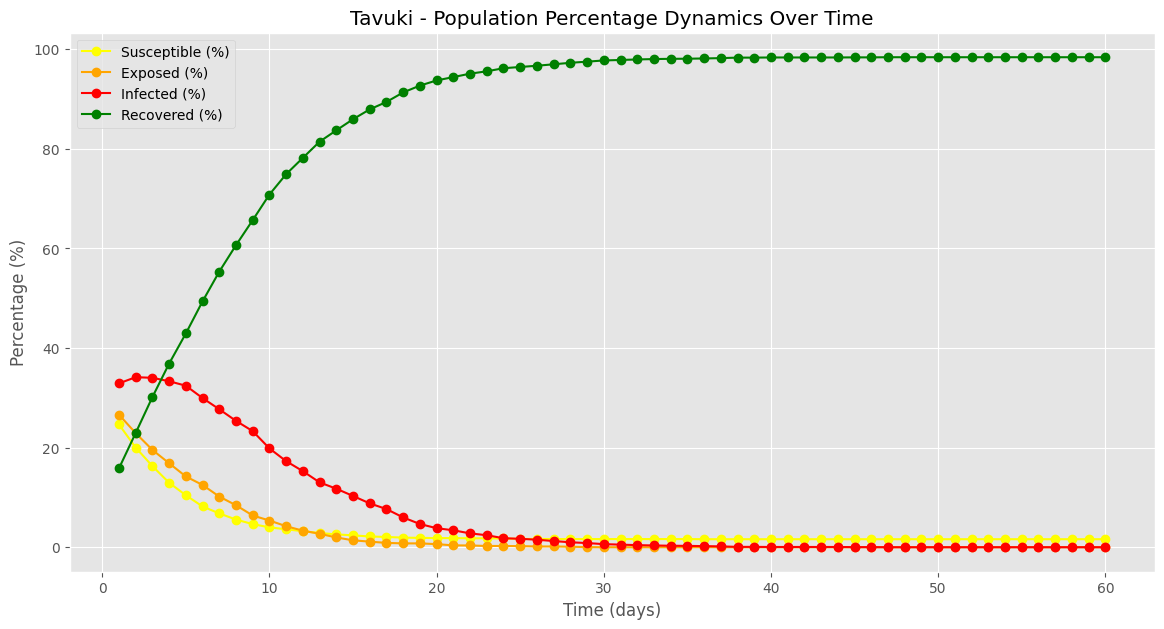

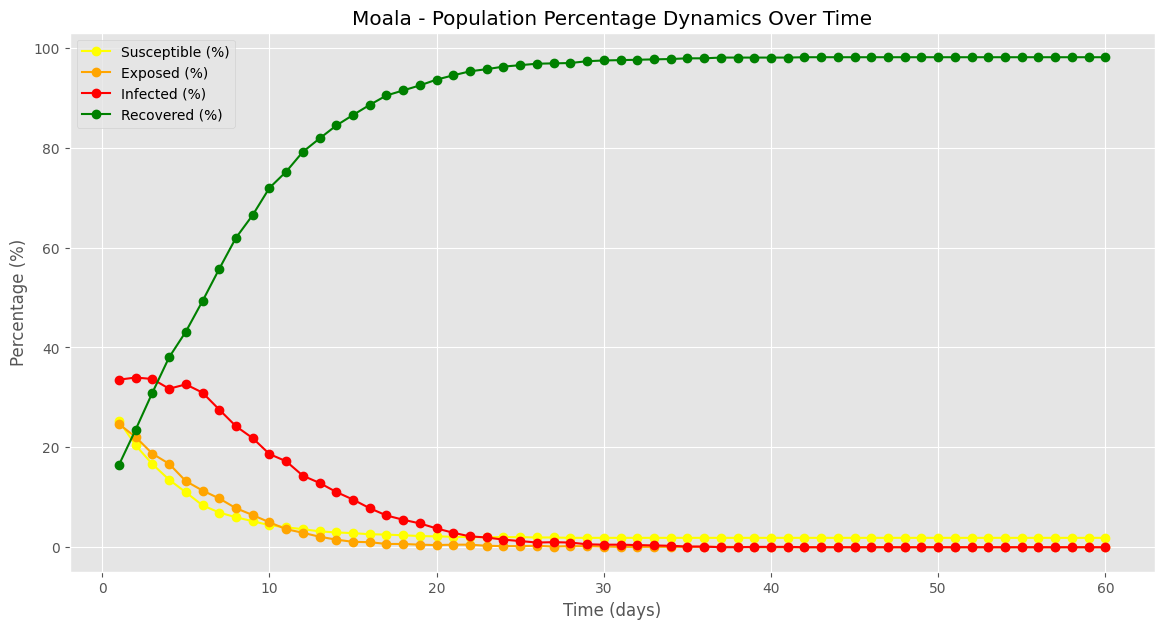

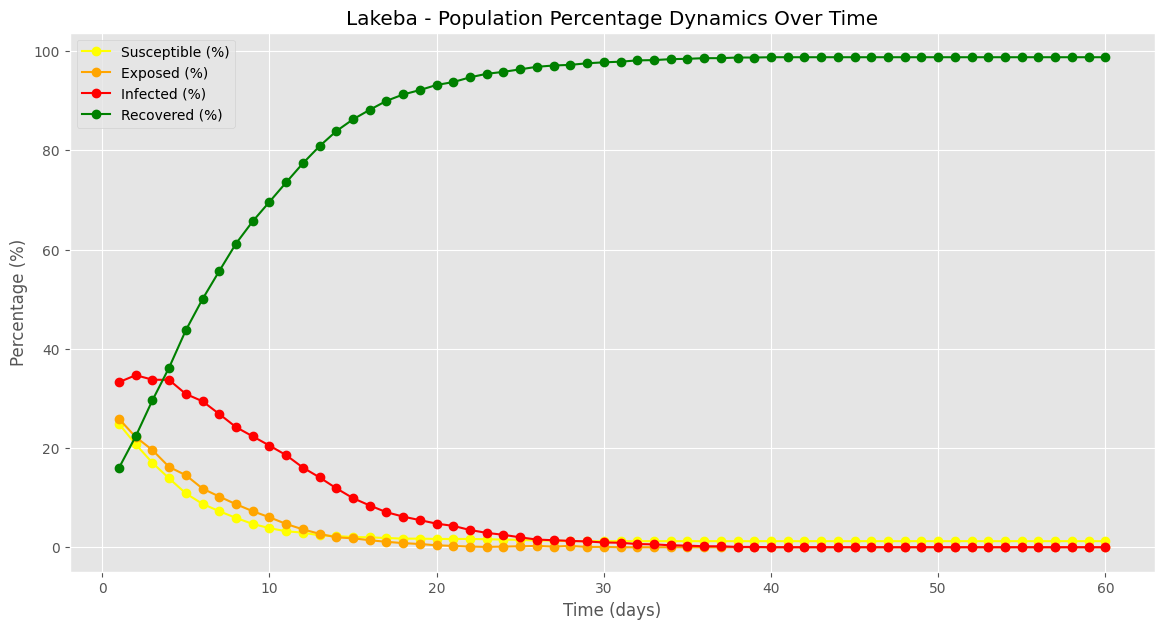

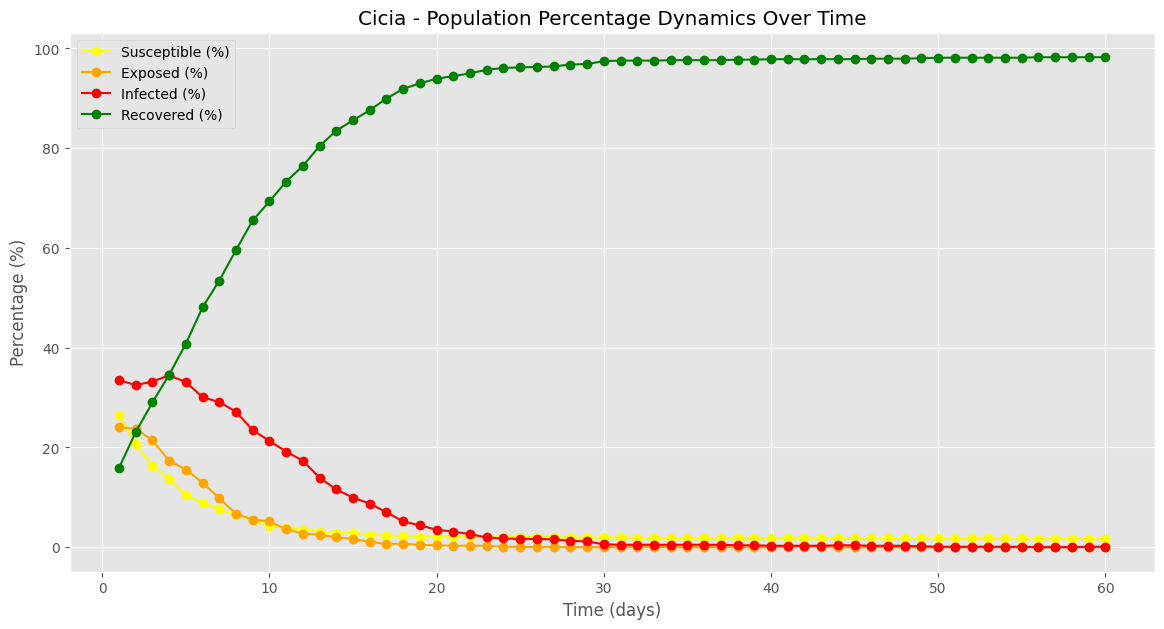

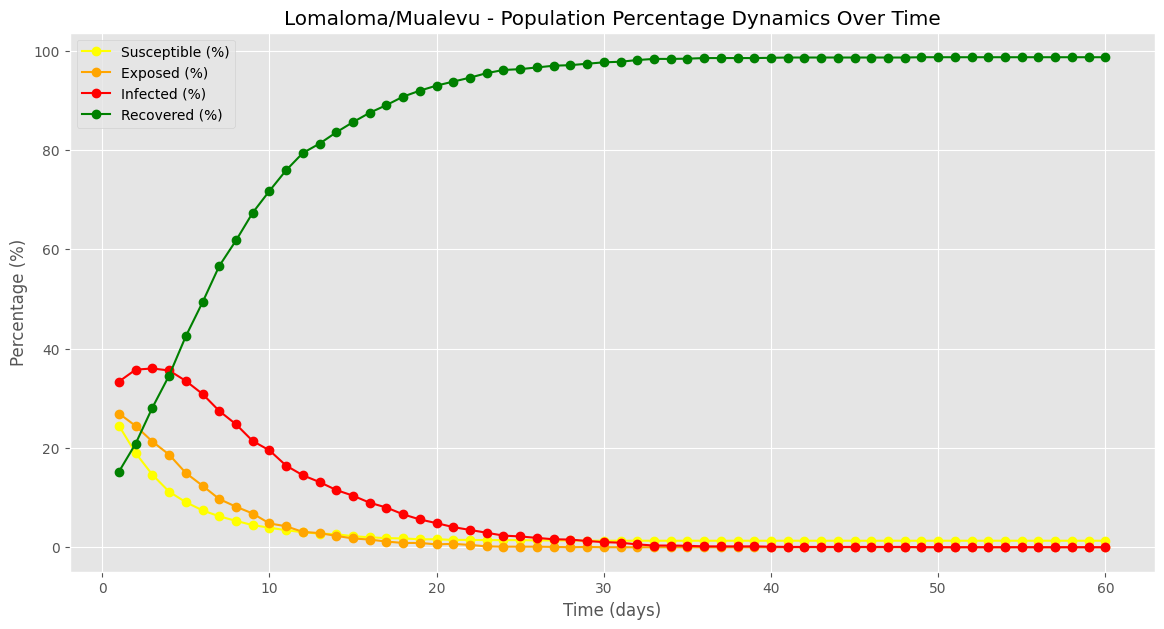

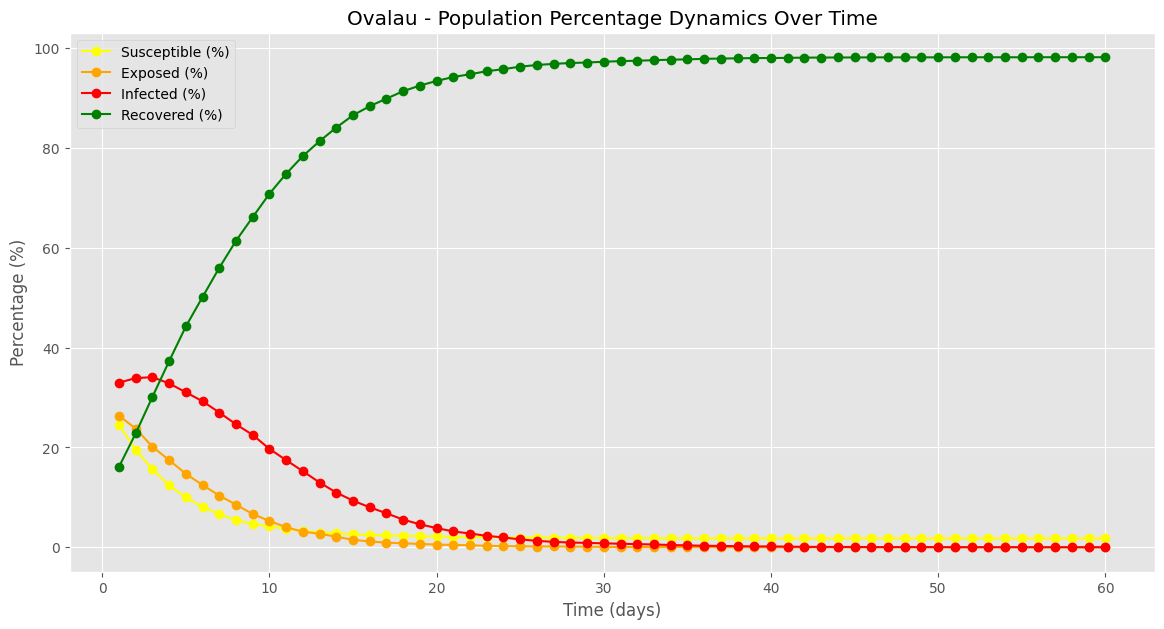

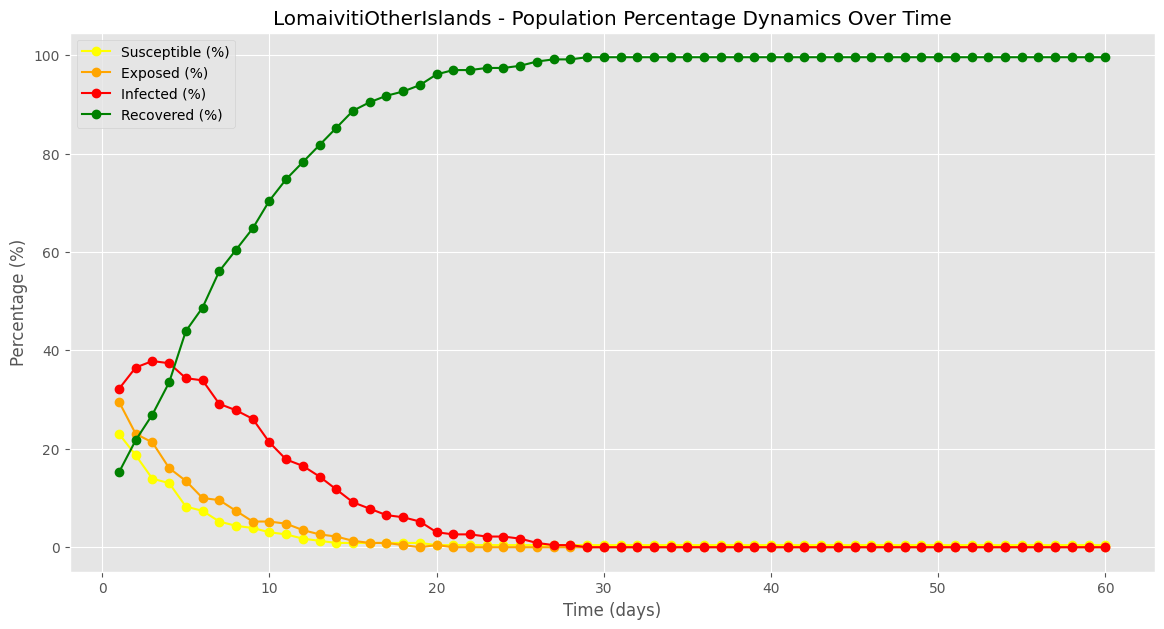

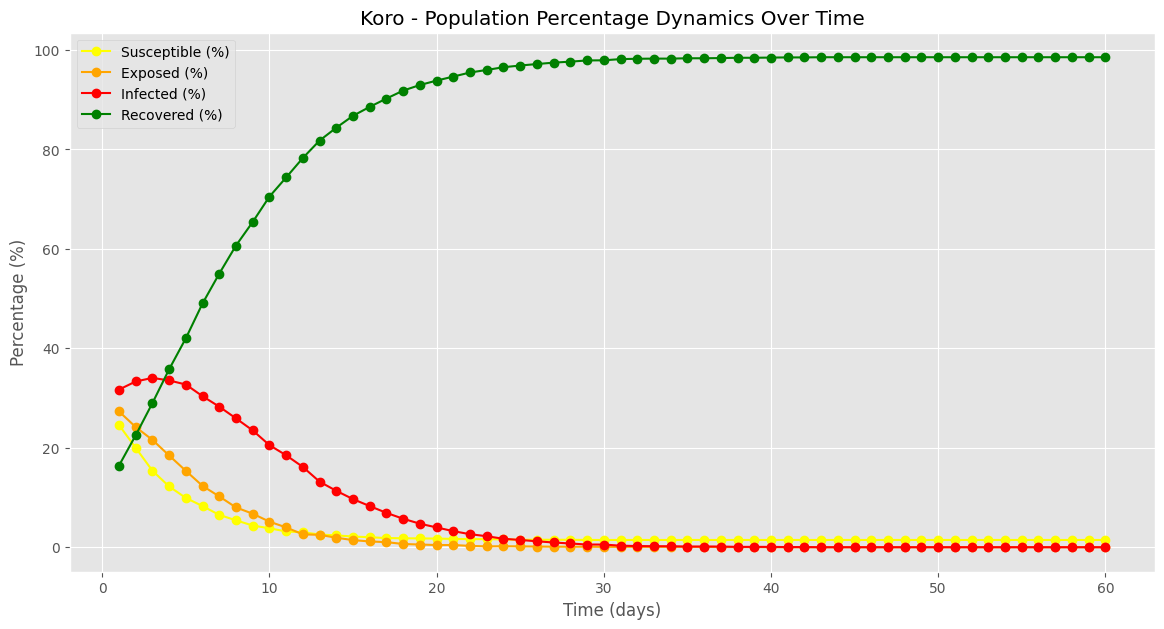

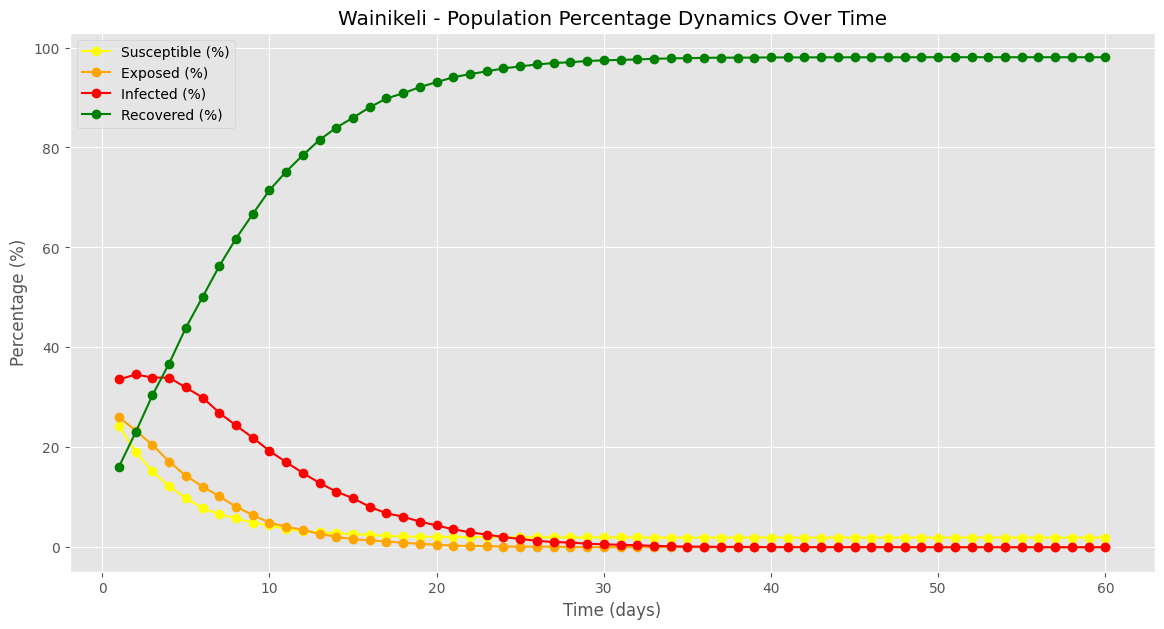

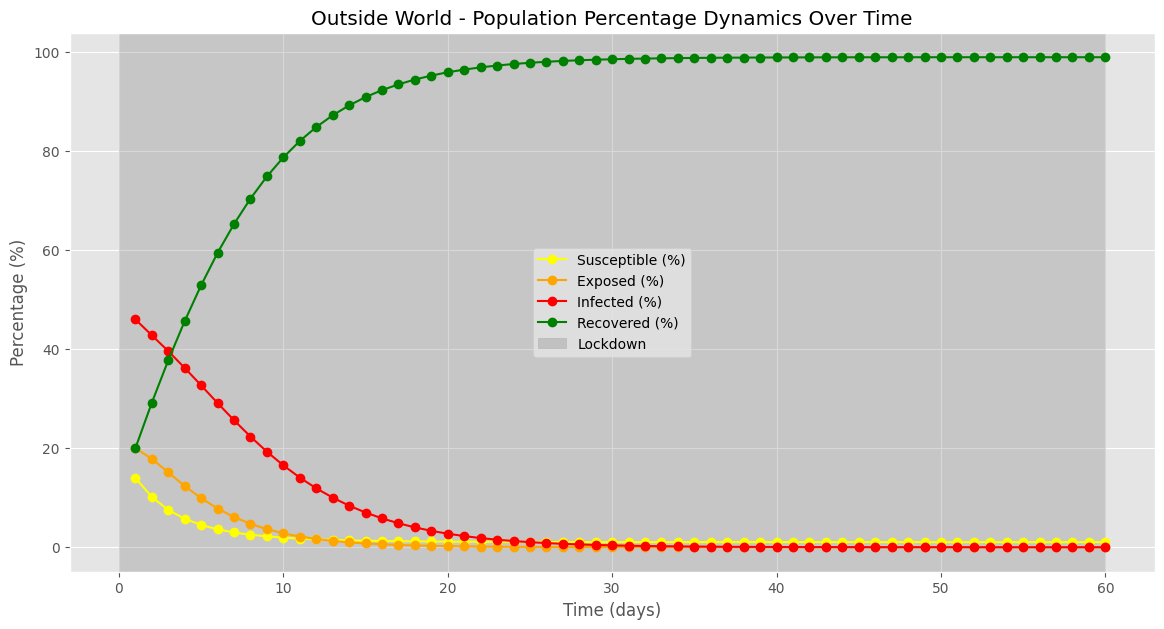

In [26]:
# Labels for percentage categories
compartment_percentage_labels = ['Susceptible (%)', 'Exposed (%)', 'Infected (%)', 'Recovered (%)']
compartment_colors = ['yellow', 'orange', 'red', 'green']

# Obtain the communities affected by the lockdown
lockdown_ports_set = set(parameters['lockdown_ports'])
affected_communities = {port_to_community[port] for port in lockdown_ports_set if port in port_to_community}

# Iterate on each community to create a graph
for community in communities:
    plt.figure(figsize=(14, 7))

    # Loop through each compartment percentage tag
    for label, color in zip(compartment_percentage_labels, compartment_colors):
        # Select the percentage data for the community and the current compartment.
        community_data = all_communities_df.loc[community]
        days = community_data.index
        percentages = community_data[label]

        plt.plot(days, percentages, label=label, color=color, marker='o')

    # Adjust axes and add title and labels
    plt.title(f"{community} - Population Percentage Dynamics Over Time")
    plt.xlabel("Time (days)")
    plt.ylabel("Percentage (%)")

    # Highlight the lockdown period for affected communities only.
    if community in affected_communities:
        plt.axvspan(lockdown_start, lockdown_end, color='grey', alpha=0.3, label='Lockdown')

    # Add legend
    plt.legend()

   # Display the graph
    plt.show()
